# Customer Segmentation - KMeans, KProtoypes

## 01: Introduction

Project Author: [Benedict Laiman](https://www.linkedin.com/in/benedict-laiman-60401319a/)

**The project's primary goal** is to utilize the K-Means and K-Prototypes algorithms for the purpose of customer segmentation, accompanied by a comprehensive exploratory data analysis of the given dataset.

**Customer segmentation** involves categorizing a company's customers into groups based on similar traits. This strategy helps businesses improve their marketing and product strategies for different customer groups. By dividing customers into specific segments, companies can create tailored marketing messages for each group, using the right communication channels like email, social media, or radio, depending on what each group prefers.


Segmentation also helps companies find opportunities to make better products, improve customer relationships, and test different prices. By focusing on their most profitable customers, providing better customer service, and using upselling and cross-selling strategies, segmentation becomes a powerful tool for optimizing marketing efforts and growing the business.



**The algorithm used** to create the customer segmentation are: 

1. KMeans: A more conventional clustering method involves employing K-Means clustering. This is an unsupervised machine learning algorithm that relies on Euclidean or Manhattan distance metrics. K-Means is well-suited for numerical data exclusively, but there is a common practice of converting categorical data into numerical form through encoding and then applying Principal Component Analysis (PCA) to the encoded data. The acceptability of this approach remains a subject of debate within the field.

2. KPrototypes *(the python package for this algorithm can be found on this [GitHub Link](https://github.com/nicodv/kmodes)):* \
A more recent method in clustering is to use KPrototypes from [Huang's Research](https://github.com/nicodv/kmodes#huang97). The K-Prototypes algorithm is an algorithm that blends K-Modes and K-Means, allowing it to group data that contains a mix of numbers and categories. 



**The dataset for this project** can be downloaded through the following [Kaggle Link](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis). Based on the information provided on Kaggle, this dataset was provided by Dr. Omar Romero-Hernandez.

**The dataset consists of several attributes:**
\
\
**A. People:**
1. ID: Customer's unique identifier
2. Year_Birth: Customer's birth year
3. Education: Customer's education level
4. Marital_Status: Customer's marital status
5. Income: Customer's yearly household income
6. Kidhome: Number of children in customer's household
7. Teenhome: Number of teenagers in customer's household
8. Dt_Customer: Date of customer's enrollment with the company
9. Recency: Number of days since customer's last purchase
10. Complain: 1 if the customer complained in the last 2 years, 0 otherwise

**B. Products:**
1. MntWines: Amount spent on wine in last 2 years
2. MntFruits: Amount spent on fruits in last 2 years
3. MntMeatProducts: Amount spent on meat in last 2 years
4. MntFishProducts: Amount spent on fish in last 2 years
5. MntSweetProducts: Amount spent on sweets in last 2 years
6. MntGoldProds: Amount spent on gold in last 2 years

**C. Promotion:**
1. NumDealsPurchases: Number of purchases made with a discount
2. AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
3. AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
4. AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
5. AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
6. AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
7. Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

**D. Place:**
1. NumWebPurchases: Number of purchases made through the company’s website
2. NumCatalogPurchases: Number of purchases made using a catalogue
3. NumStorePurchases: Number of purchases made directly in stores
4. NumWebVisitsMonth: Number of visits to company’s website in the last month

## 02: Exploratory Data Analysis Pre-Clustering

#### 02.01: Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import math

import dataframe_image as dfi

import scipy.stats as stats
from kmodes.kprototypes import KPrototypes
from kneed import KneeLocator
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, silhouette_visualizer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 300)
sns.set_theme(style="whitegrid", palette="pastel")

In [2]:
RANDOM_STATE = 2023  # Setting up random_state for pseudo randomization

#### 02.02: Importing Data

In [3]:
df = pd.read_csv('marketing_campaign.csv', sep='\t', parse_dates=['Dt_Customer'])

In [4]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0  5524        1957  Graduation         Single  58138.0        0         0  2012-04-09       58       635         88              546              172                88            88                  3                8                   10                  4                  7             0   
1  2174        1954  Graduation         Single  46344.0        1         1  2014-08-03       38        11          1                6                2                 1             6                  2                1                    1                  2                  5             0   
2  4141        1965  Graduation       Together  71613.0        0         0  2013-08-21       26       426         49              127              111                21            42                  1                8                    2                 10                  4             0   
3  6182        1984  Graduation       Together  26646.0        1         0  2014-10-02       26        11          4               20               10                 3             5                  2                2                    0                  4                  6             0   
4  5324        1981         PhD        Married  58293.0        1         0  2014-01-19       94       173         43              118               46                27            15                  5                5                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  
0             0             0             0             0         0              3         11         1  
1             0             0             0             0         0              3         11         0  
2             0             0             0             0         0              3         11         0  
3             0             0             0             0         0              3         11         0  
4             0             0             0             0         0              3         11         0

#### 02.03: Data Understanding

- 02.03a: Categorizing columns based on dataset description and their data types

In [5]:
listcols_people = ['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'Complain']  # Mixed between categorical and numerical
listcols_product = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']  # numerical
listcols_promotion = ['NumDealsPurchases', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']  # Mixed between categorical and numerical
listcols_place = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']  # numerical

listcols_people_cat = ['ID', 'Education', 'Marital_Status', 'Complain']  # listcols_people categorical
listcols_people_num = [i for i in listcols_people if i not in listcols_people_cat]  # listcols_people numerical

listcols_promotion_num = ['NumDealsPurchases']  # listcols_promotion numerical
listcols_promotion_cat = [i for i in listcols_promotion if i not in listcols_promotion_num]  # listcols_promotion categorical

list_categorical = listcols_people_cat+listcols_promotion_cat
list_numerical = listcols_people_num+listcols_product+listcols_promotion_num+listcols_place

In [6]:
print(f"list_categorical: {np.array(list_categorical)}")  # list of all categorical columns
print(f"list_numerical: {np.array(list_numerical)}")  # list of all numerical columns

list_categorical: ['ID' 'Education' 'Marital_Status' 'Complain' 'AcceptedCmp1'
 'AcceptedCmp2' 'AcceptedCmp3' 'AcceptedCmp4' 'AcceptedCmp5' 'Response']
list_numerical: ['Year_Birth' 'Income' 'Kidhome' 'Teenhome' 'Dt_Customer' 'Recency'
 'MntWines' 'MntFruits' 'MntMeatProducts' 'MntFishProducts'
 'MntSweetProducts' 'MntGoldProds' 'NumDealsPurchases' 'NumWebPurchases'
 'NumCatalogPurchases' 'NumStorePurchases' 'NumWebVisitsMonth']


- 02.03b: Arranging the columns according to the dataset description.

In [7]:
df = df[listcols_people+listcols_product+listcols_promotion+listcols_place]

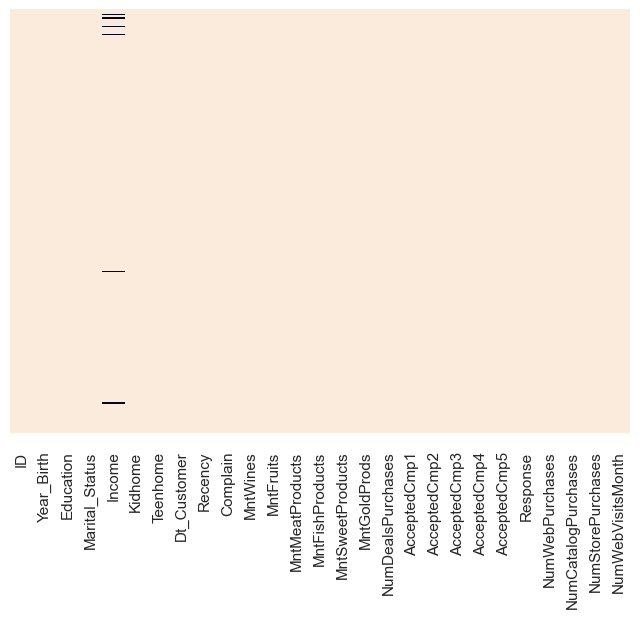

In [8]:
# It can be seen from the heatmap below that there is some missing values in column 'Income'
plt.figure()
sns.heatmap(df.isna(), yticklabels=False, cbar=False, cmap='rocket_r')
plt.show()

02.03c: Checking the columns' Dtype as well as the number of missing values in column 'Income'

In [9]:
# Checking the columns' Dtype as well as the number of missing values in column 'Income'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   Complain             2240 non-null   int64         
 10  MntWines             2240 non-null   int64         
 11  MntFruits            2240 non-null   int64         
 12  MntMeatProducts      2240 non-null   int64         
 13  MntFishProducts      2240 non-nul

In [10]:
# Checking the descriptive statistic of the numerical dataset.
# We will not use 'df.describe()' for checking, as some categorical columns are in the int64 format, which could potentially lead to misleading information.
df[list_numerical].describe()

Year_Birth         Income      Kidhome     Teenhome      Recency     MntWines    MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth
count  2240.000000    2216.000000  2240.000000  2240.000000  2240.000000  2240.000000  2240.000000      2240.000000      2240.000000       2240.000000   2240.000000        2240.000000      2240.000000          2240.000000        2240.000000        2240.000000
mean   1968.805804   52247.251354     0.444196     0.506250    49.109375   303.935714    26.302232       166.950000        37.525446         27.062946     44.021875           2.325000         4.084821             2.662054           5.790179           5.316518
std      11.984069   25173.076661     0.538398     0.544538    28.962453   336.597393    39.773434       225.715373        54.628979         41.280498     52.167439           1.932238         2.778714             2.923101           3.250958           2.426645
min    1893.000000    1730.000000     0.000000     0.000000     0.000000     0.000000     0.000000         0.000000         0.000000          0.000000      0.000000           0.000000         0.000000             0.000000           0.000000           0.000000
25%    1959.000000   35303.000000     0.000000     0.000000    24.000000    23.750000     1.000000        16.000000         3.000000          1.000000      9.000000           1.000000         2.000000             0.000000           3.000000           3.000000
50%    1970.000000   51381.500000     0.000000     0.000000    49.000000   173.500000     8.000000        67.000000        12.000000          8.000000     24.000000           2.000000         4.000000             2.000000           5.000000           6.000000
75%    1977.000000   68522.000000     1.000000     1.000000    74.000000   504.250000    33.000000       232.000000        50.000000         33.000000     56.000000           3.000000         6.000000             4.000000           8.000000           7.000000
max    1996.000000  666666.000000     2.000000     2.000000    99.000000  1493.000000   199.000000      1725.000000       259.000000        263.000000    362.000000          15.000000        27.000000            28.000000          13.000000          20.000000

In [11]:
# Creating a 'matrix_checker' function to check the attributes of the columns, such as category, data type, 
# total missing values, missing values percentage, total unique variables, and examples of the data
def matrix_checker(df):
    matrix_checker = []
    for i in df.columns:
        matrix_checker.append([
            df[i].dtype,
            df[i].isna().sum(),
            f'{round(df[i].isna().sum()/len(df[i])*100,2)}%',
            df[i].nunique(),
            df[i].unique()[:8]
        ])
    temp_df = pd.DataFrame(matrix_checker, index=df.columns.values, columns='Dtype Total_Nan Nan_Pct Num_Unique Example'.split())
    list_category = [
        'listcols_people' if i in listcols_people
        else 'listcols_product' if i in listcols_product
        else 'listcols_promotion' if i in listcols_promotion
        else 'listcols_place' 
        for i in df.columns
    ]
    list_catnum = [
        'cat' if (i in listcols_people_cat) or (i in listcols_promotion_cat)
        else 'num' 
        for i in df.columns
    ]
    temp_df.insert(0,'Category', list_category)  # category
    temp_df.insert(1, 'Catnum', list_catnum)  # categorical vs numerical
    display(temp_df)
    
matrix_checker(df)

Category Catnum           Dtype  Total_Nan Nan_Pct  Num_Unique                                            Example
ID                      listcols_people    cat           int64          0    0.0%        2240    [5524, 2174, 4141, 6182, 5324, 7446, 965, 6177]
Year_Birth              listcols_people    num           int64          0    0.0%          59   [1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985]
Education               listcols_people    cat          object          0    0.0%           5         [Graduation, PhD, Master, Basic, 2n Cycle]
Marital_Status          listcols_people    cat          object          0    0.0%           8  [Single, Together, Married, Divorced, Widow, A...
Income                  listcols_people    num         float64         24   1.07%        1974  [58138.0, 46344.0, 71613.0, 26646.0, 58293.0, ...
Kidhome                 listcols_people    num           int64          0    0.0%           3                                          [0, 1, 2]
Teenhome                listcols_people    num           int64          0    0.0%           3                                          [0, 1, 2]
Dt_Customer             listcols_people    num  datetime64[ns]          0    0.0%         663  [2012-04-09T00:00:00.000000000, 2014-08-03T00:...
Recency                 listcols_people    num           int64          0    0.0%         100                   [58, 38, 26, 94, 16, 34, 32, 19]
Complain                listcols_people    cat           int64          0    0.0%           2                                             [0, 1]
MntWines               listcols_product    num           int64          0    0.0%         776              [635, 11, 426, 173, 520, 235, 76, 14]
MntFruits              listcols_product    num           int64          0    0.0%         158                     [88, 1, 49, 4, 43, 42, 65, 10]
MntMeatProducts        listcols_product    num           int64          0    0.0%         558                [546, 6, 127, 20, 118, 98, 164, 56]
MntFishProducts        listcols_product    num           int64          0    0.0%         182                    [172, 2, 111, 10, 46, 0, 50, 3]
MntSweetProducts       listcols_product    num           int64          0    0.0%         177                      [88, 1, 21, 3, 27, 42, 49, 2]
MntGoldProds           listcols_product    num           int64          0    0.0%         213                     [88, 6, 42, 5, 15, 14, 27, 23]
NumDealsPurchases    listcols_promotion    num           int64          0    0.0%          15                          [3, 2, 1, 5, 4, 15, 7, 0]
AcceptedCmp1         listcols_promotion    cat           int64          0    0.0%           2                                             [0, 1]
AcceptedCmp2         listcols_promotion    cat           int64          0    0.0%           2                                             [0, 1]
AcceptedCmp3         listcols_promotion    cat           int64          0    0.0%           2                                             [0, 1]
AcceptedCmp4         listcols_promotion    cat           int64          0    0.0%           2                                             [0, 1]
AcceptedCmp5         listcols_promotion    cat           int64          0    0.0%           2                                             [0, 1]
Response             listcols_promotion    cat           int64          0    0.0%           2                                             [1, 0]
NumWebPurchases          listcols_place    num           int64          0    0.0%          15                           [8, 1, 2, 5, 6, 7, 4, 3]
NumCatalogPurchases      listcols_place    num           int64          0    0.0%          14                         [10, 1, 2, 0, 3, 4, 6, 28]
NumStorePurchases        listcols_place    num           int64          0    0.0%          14                          [4, 2, 10, 6, 7, 0, 3, 8]
NumWebVisitsMonth        listcols_place    num           int64          0    0.0%          16                       

It can be seen from the information above that column "Income" has several missing values. Since the missing values are only around 1% of the data, we are going to remove it, instead of imputing it.

In [12]:
df.dropna(inplace=True)
df.info()
# Missing values has been removed

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   Complain             2216 non-null   int64         
 10  MntWines             2216 non-null   int64         
 11  MntFruits            2216 non-null   int64         
 12  MntMeatProducts      2216 non-null   int64         
 13  MntFishProducts      2216 non-nul

#### 02.04: Feature Engineering

Performing feature engineering to create several new columns and transform variables from the raw data:

1. Generating the 'Age' column from the 'Year_Birth' and 'Dt_Customer' columns to indicate the age of the customers rather than using their year of birth.
2. Categorizing variables in the 'Education' column into 'No Higher Degree', 'S1', 'S2', and 'S3' to simplify the variables.
3. Generating the 'Occupancy' column from the 'Marital_Status' column to simplify variables. This column consists of the unique values '1' and '2' to represent the number of occupants.
4. Generating the 'Children' column by adding up the 'Kidhome' and 'Teenhome' columns.
5. Generating the 'isParent' column from the 'Children' column to identify if the customers have children.
6. Generating the 'FamilySize' column from the 'Living' and 'Children' columns.
7. Generate the 'MntTotal' column by summing all the columns in the 'Product' category.
8. Removing unnecessary columns & organizing columns.

In [13]:
list_categorical  # checking the categorical columns

['ID',
 'Education',
 'Marital_Status',
 'Complain',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'Response']

In [14]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome Dt_Customer  Recency  Complain  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  Response  \
0  5524        1957  Graduation         Single  58138.0        0         0  2012-04-09       58         0       635         88              546              172                88            88                  3             0             0             0             0             0         1   
1  2174        1954  Graduation         Single  46344.0        1         1  2014-08-03       38         0        11          1                6                2                 1             6                  2             0             0             0             0             0         0   
2  4141        1965  Graduation       Together  71613.0        0         0  2013-08-21       26         0       426         49              127              111                21            42                  1             0             0             0             0             0         0   
3  6182        1984  Graduation       Together  26646.0        1         0  2014-10-02       26         0        11          4               20               10                 3             5                  2             0             0             0             0             0         0   
4  5324        1981         PhD        Married  58293.0        1         0  2014-01-19       94         0       173         43              118               46                27            15                  5             0             0             0             0             0         0   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  
0                8                   10                  4                  7  
1                1                    1                  2                  5  
2                8                    2                 10                  4  
3                2                    0                  4                  6  
4                5                    3                  6                  5

In my opinion, it is much better to have the current age of the customer rather than their year of birth for further analysis. Hence, I am going to create a column called "Age" and use the latest year in the "Dt_Customer" column as the reference year. (It is assumed that the latest year from "Dt_Customer" is the year in which this analysis takes place.)

In [15]:
# 1. Generating the 'Age' column
list_age = df['Dt_Customer'].dt.year.max() - df['Year_Birth']
df.insert(1, 'Age', list_age)  # Numerical
df.head(3)

ID  Age  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome Dt_Customer  Recency  Complain  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  Response  \
0  5524   57        1957  Graduation         Single  58138.0        0         0  2012-04-09       58         0       635         88              546              172                88            88                  3             0             0             0             0             0         1   
1  2174   60        1954  Graduation         Single  46344.0        1         1  2014-08-03       38         0        11          1                6                2                 1             6                  2             0             0             0             0             0         0   
2  4141   49        1965  Graduation       Together  71613.0        0         0  2013-08-21       26         0       426         49              127              111                21            42                  1             0             0             0             0             0         0   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  
0                8                   10                  4                  7  
1                1                    1                  2                  5  
2                8                    2                 10                  4

In [16]:
# 2. Categorizing variables in the 'Education' column into 'No Higher Degree', 'S1', 'S2', and 'S3' to simplify the variables.
df['Education'] = df['Education'].map({'PhD':'S3', 'Master': 'S2', 'Graduation': 'S1', 'Basic':'NoHigherDegree', '2n Cycle': 'NoHigherDegree'})  # Categorical

# 3. Generating the 'Occupancy' column from the 'Marital_Status' column to simplify variables.
df['Occupancy'] = df['Marital_Status'].map({'Single': 1, 'Together': 2, 'Married': 2, 'Divorced': 1, 'Widow': 1, 'Alone': 1, 'Absurd': 1, 'YOLO': 1})  # Numerical

# 4. Generating the 'Children' column by adding up the 'Kidhome' and 'Teenhome' columns.
df['Children'] = df['Kidhome'] + df['Teenhome']  # Numerical

# 5. Generating the 'isParent' column from the 'Children' column to identify if the customers have children.
df['isParent'] = np.where(df['Children']>0, 1, 0)  # Categorical

# 6. Generating the 'FamilySize' column from the 'Living' and 'Children' columns.
df['FamilySize'] = df['Occupancy'] + df['Children'] # Numerical

# 7. Generate the 'MntTotal' column by summing all the columns in the 'Product' category.
df['MntTotal'] = df[listcols_product].sum(axis=1)

In [17]:
# 8. Removing unnecessary categorical columns & organizing categorical columns.
list_categorical.remove('Marital_Status')
list_categorical.insert(2, 'isParent')
list_categorical.insert(2, 'Occupancy')
np.array(list_categorical)

array(['ID', 'Education', 'Occupancy', 'isParent', 'Complain',
       'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'Response'], dtype='<U12')

In [18]:
# 8. Removing unnecessary numerical columns & organizing numerical columns.
list_numerical.remove('Year_Birth')
list_numerical.insert(3, 'FamilySize')
list_numerical.insert(3, 'Children')
list_numerical.insert(0,'Age')
list_numerical.insert(14, 'MntTotal')
np.array(list_numerical)

array(['Age', 'Income', 'Kidhome', 'Teenhome', 'Children', 'FamilySize',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'MntTotal', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'],
      dtype='<U19')

In [19]:
listcols_product.append('MntTotal')

In [20]:
listcols_people_cat.remove('Marital_Status')
listcols_people_cat.insert(2, 'isParent')
listcols_people_cat.insert(2, 'Occupancy')

In [21]:
listcols_people_num.remove('Year_Birth')
listcols_people_num.insert(3, 'FamilySize')
listcols_people_num.insert(3, 'Children')
listcols_people_num.insert(0, 'Age')

In [22]:
df = df[listcols_people_cat+listcols_people_num+listcols_product+listcols_promotion+listcols_place]

#### 02.05: Checking the Descriptive Statistics

In [23]:
df[list_numerical].describe()  # Checking the descriptive statistic of numerical columns

Age         Income      Kidhome     Teenhome     Children   FamilySize      Recency     MntWines    MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds     MntTotal  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth
count  2216.000000    2216.000000  2216.000000  2216.000000  2216.000000  2216.000000  2216.000000  2216.000000  2216.000000      2216.000000      2216.000000       2216.000000   2216.000000  2216.000000        2216.000000      2216.000000          2216.000000        2216.000000        2216.000000
mean     45.179603   52247.251354     0.441787     0.505415     0.947202     2.592509    49.012635   305.091606    26.356047       166.995939        37.637635         27.028881     43.965253   607.075361           2.323556         4.085289             2.671029           5.800993           5.319043
std      11.985554   25173.076661     0.536896     0.544181     0.749062     0.905722    28.948352   337.327920    39.793917       224.283273        54.752082         41.072046     51.815414   602.900476           1.923716         2.740951             2.926734           3.250785           2.425359
min      18.000000    1730.000000     0.000000     0.000000     0.000000     1.000000     0.000000     0.000000     0.000000         0.000000         0.000000          0.000000      0.000000     5.000000           0.000000         0.000000             0.000000           0.000000           0.000000
25%      37.000000   35303.000000     0.000000     0.000000     0.000000     2.000000    24.000000    24.000000     2.000000        16.000000         3.000000          1.000000      9.000000    69.000000           1.000000         2.000000             0.000000           3.000000           3.000000
50%      44.000000   51381.500000     0.000000     0.000000     1.000000     3.000000    49.000000   174.500000     8.000000        68.000000        12.000000          8.000000     24.500000   396.500000           2.000000         4.000000             2.000000           5.000000           6.000000
75%      55.000000   68522.000000     1.000000     1.000000     1.000000     3.000000    74.000000   505.000000    33.000000       232.250000        50.000000         33.000000     56.000000  1048.000000           3.000000         6.000000             4.000000           8.000000           7.000000
max     121.000000  666666.000000     2.000000     2.000000     3.000000     5.000000    99.000000  1493.000000   199.000000      1725.000000       259.000000        262.000000    321.000000  2525.000000          15.000000        27.000000            28.000000          13.000000          20.000000

In [24]:
len(list_numerical)  # Checking the number of numerical columns

20

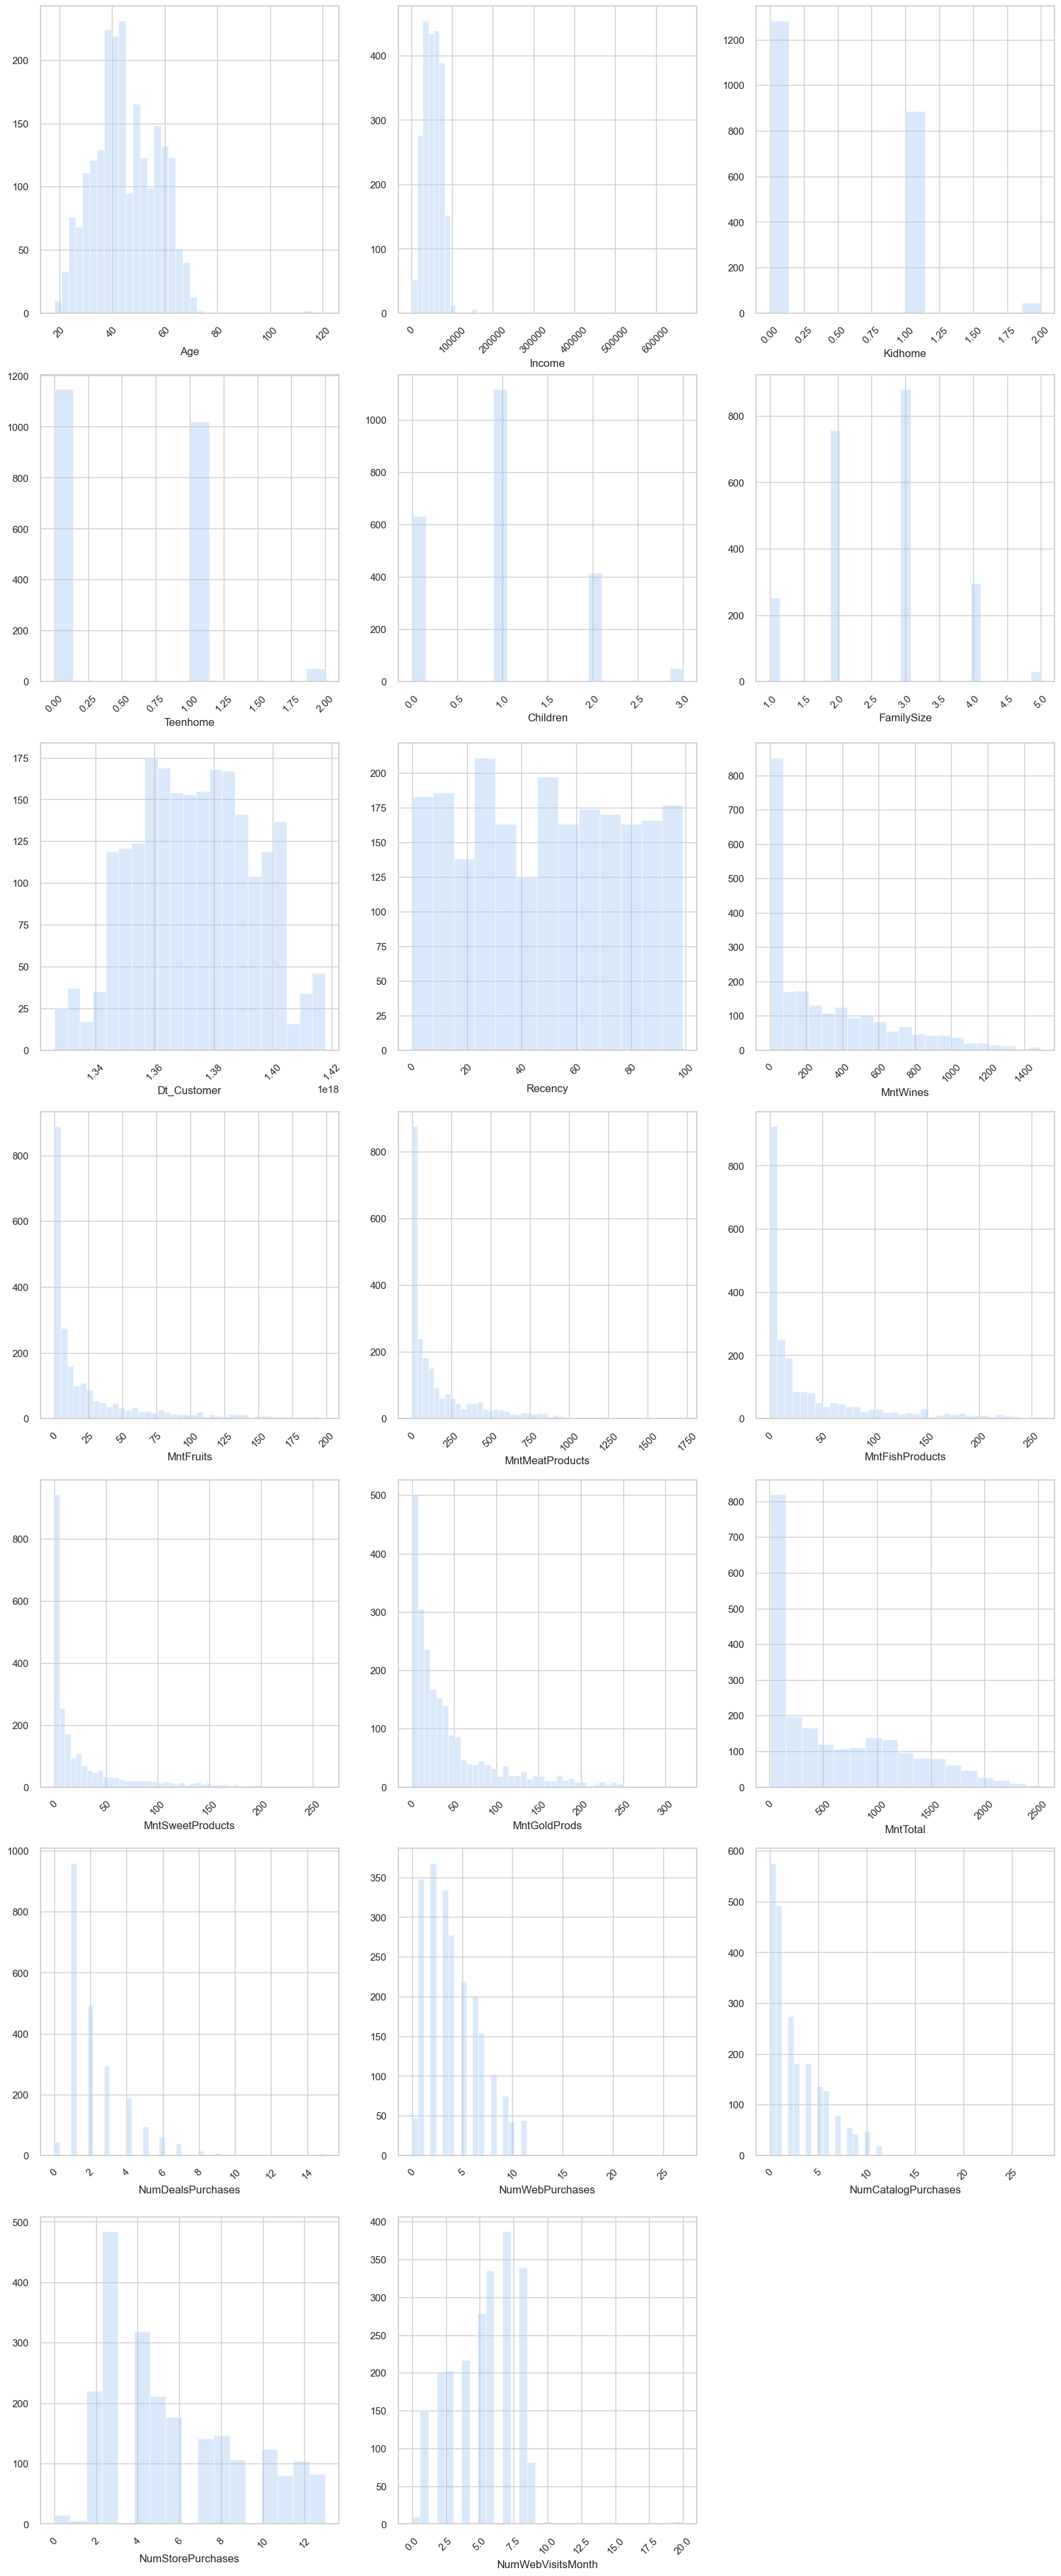

In [25]:
# Plotting the distribution of numerical columns
plt.figure(figsize=(20,50))
for i in enumerate(list_numerical):
    plt.subplot(7,3,i[0]+1)
    sns.distplot(df[i[1]], kde=False)
    plt.xticks(rotation=45)

The distribution plots show that some columns are **relatively normally distributed**, while others, such as the columns from the products category (MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, and MntGoldProds), are **highly skewed (right-skewed)**. Additionally, columns like "NumDealsPurchases" and "Place columns," such as NumWebPurchases, NumCatalogPurchases, NumStorePurchases, and NumWebVisitsMonth, are **also skewed**, with all the mentioned columns being right-skewed except for NumWebVisitsMonth, which is left-skewed.

In [26]:
# Creating an outlier checker function
def outlierChecker(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3-q1
    lower_whisker = q1-1.5*iqr
    upper_whisker = q3+1.5*iqr
    arr_outlier = np.array([i for i in series if (i < lower_whisker) or (i > upper_whisker)])
    return arr_outlier

# Creating dictionary outlier checker function
def dict_outlier(list_):
    list_tupNumerical = [(i, outlierChecker(df[i])) for i in list_]
    dict_Numerical = {i:j for (i,j) in list_tupNumerical}
    return dict_Numerical

In [27]:
# This is a list of columns that are relatively normally distributed, and we are going to check for outliers in these columns.
# We will not check for outliers in the heavily skewed columns, as they are likely to yield a large number of outliers.
list_relativelyNormal = 'Age Income Kidhome Teenhome Children FamilySize Dt_Customer Recency'.split()
dict_outlier(list_relativelyNormal)
# It can be seen that the columns "Age", "Income", "Children", amd "FamilySize" contain outliers.

{'Age': array([114, 121, 115]),
 'Income': array([157243., 162397., 153924., 160803., 157733., 157146., 156924.,
        666666.]),
 'Kidhome': array([], dtype=float64),
 'Teenhome': array([], dtype=float64),
 'Children': array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3]),
 'FamilySize': array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5]),
 'Dt_Customer': array([], dtype=float64),
 'Recency': array([], dtype=float64)}

Before checking for outliers in these columns, I am going to create a function to determine whether or not these columns follow a normal distribution using the Shapiro-Wilk Normality Test.

In [28]:
# Creating Shapiro-Wilk Normality Test 
def ShapiNormalTest(array, alpha):
    statistic, pvalue = stats.shapiro(df[array])

    if pvalue < alpha:
        print()
        print(f"H1: With {1-alpha} confidence level, '{array}' DOES 'NOT' COME from normally distributed data")
    else: 
        print()
        print(f"H0: With {1-alpha} confidence level, '{array}' DOES COME from normally distributed data")
    print(f"The statistic is: {round(statistic, 3)}, and the Pvalue: {pvalue}")

In [29]:
list_testShapiro = ['Age', 'Income', 'Children', 'FamilySize']
for i in list_testShapiro:
    ShapiNormalTest(i, 0.05)
    # print(df[i].isna().sum())


H1: With 0.95 confidence level, 'Age' DOES 'NOT' COME from normally distributed data
The statistic is: 0.976, and the Pvalue: 4.794632996462688e-19

H1: With 0.95 confidence level, 'Income' DOES 'NOT' COME from normally distributed data
The statistic is: 0.777, and the Pvalue: 0.0

H1: With 0.95 confidence level, 'Children' DOES 'NOT' COME from normally distributed data
The statistic is: 0.829, and the Pvalue: 1.2611686178923354e-43

H1: With 0.95 confidence level, 'FamilySize' DOES 'NOT' COME from normally distributed data
The statistic is: 0.892, and the Pvalue: 7.450588692029346e-37


It turns out that these columns are not normally distributed. Nevertheless, we are going to check for outliers in these columns and later decide whether or not to drop the outliers.

In [30]:
len(dict_outlier(list_relativelyNormal)['Children'])/len(df)

0.02256317689530686

In [31]:
len(dict_outlier(list_relativelyNormal)['FamilySize'])/len(df)

0.013989169675090252

- Checking Outliers in the column "Age"

In [32]:
# The outliers in the 'AgeAge' column correspond to exceptionally old customers. However, I'm assuming that the data is correct, and therefore, I will not drop these rows. 
# It's worth noting that the oldest person ever recorded, whose age has been independently verified, is Jeanne Calment, 
# who lived to be 122 years and 164 days, according to Wikipedia.

df[(df['Age']==114) | (df['Age']==121) | (df['Age']==115)]

ID       Education  Occupancy  isParent  Complain  Age   Income  Kidhome  Teenhome  Children  FamilySize Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  MntTotal  NumDealsPurchases  AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  \
192   7829  NoHigherDegree          1         1         1  114  36640.0        1         0         1           2  2013-09-26       99        15          6                8                7                 4            25        65                  1             0             0             0   
239  11004  NoHigherDegree          1         1         0  121  60182.0        0         1         1           2  2014-05-17       23         8          0                5                7                 0             2        22                  1             0             0             0   
339   1150              S3          2         0         0  115  83532.0        0         0         0           2  2013-09-26       36       755        144              562              104                64           224      1853                  1             0             0             0   

     AcceptedCmp4  AcceptedCmp5  Response  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  
192             0             0         0                2                    1                  2                  5  
239             0             0         0                1                    0                  2                  4  
339             0             1         0                4                    6                  4                  1

In [33]:
print(f"Youngest Customer: {df['Age'].min()}, Oldest Customer: {df['Age'].max()}")

Youngest Customer: 18, Oldest Customer: 121


In [34]:
display(df[df['Age']==18])
display(df[df['Age']==121])

ID       Education  Occupancy  isParent  Complain  Age   Income  Kidhome  Teenhome  Children  FamilySize Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  MntTotal  NumDealsPurchases  AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  \
46    9909  NoHigherDegree          2         0         0   18   7500.0        0         0         0           2  2012-09-11       24         3         18               14               15                22            50       122                  3             0             0             0   
1170   193  NoHigherDegree          2         0         0   18  14421.0        0         0         0           2  2014-02-17       81         0          0                2                3                 3             8        16                  1             0             0             1   

      AcceptedCmp4  AcceptedCmp5  Response  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  
46               0             0         1                3                    1                  3                  9  
1170             0             0         0                1                    0                  2                  5

ID       Education  Occupancy  isParent  Complain  Age   Income  Kidhome  Teenhome  Children  FamilySize Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  MntTotal  NumDealsPurchases  AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  \
239  11004  NoHigherDegree          1         1         0  121  60182.0        0         1         1           2  2014-05-17       23         8          0                5                7                 0             2        22                  1             0             0             0   

     AcceptedCmp4  AcceptedCmp5  Response  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  
239             0             0         0                1                    0                  2                  4

- Checking Outliers in the column "Income"

In [35]:
# It is not surprising to observe several outliers in the 'Income' column, as columns related to monetary values often tend to have outliers.
# In this instance, I will only drop the customer with ID 9432, as their income is significantly higher than the rest of the outliers, 
# and the reported income amount itself appears suspicious.
# I suspect that the customer with ID 9432 may have entered false income information.
df[df['Income'].isin(dict_outlier(list_relativelyNormal)['Income'])]

ID Education  Occupancy  isParent  Complain  Age    Income  Kidhome  Teenhome  Children  FamilySize Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  MntTotal  NumDealsPurchases  AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  \
164    8475        S3          2         1         0   41  157243.0        0         1         1           3  2014-01-03       98        20          2             1582                1                 2             1      1608                 15             0             0             0   
617    1503        S3          2         1         0   38  162397.0        1         1         2           4  2013-03-06       31        85          1               16                2                 1             2       107                  0             0             0             0   
655    5555        S1          1         0         0   39  153924.0        0         0         0           1  2014-07-02       81         1          1                1                1                 1             1         6                  0             0             0             0   
687    1501        S3          2         0         0   32  160803.0        0         0         0           2  2012-04-08       21        55         16             1622               17                 3             4      1717                 15             0             0             0   
1300   5336        S2          2         1         0   43  157733.0        1         0         1           3  2013-04-06       37        39          1                9                2                 0             8        59                  0             0             0             0   
1653   4931        S1          2         0         0   37  157146.0        0         0         0           2  2013-04-29       13         1          0             1725                2                 1             1      1730                  0             0             0             0   
2132  11181        S3          2         0         0   65  156924.0        0         0         0           2  2013-08-29       85         2          1                2                1                 1             1         8                  0             0             0             0   
2233   9432        S1          2         1         0   37  666666.0        1         0         1           3  2013-02-06       23         9         14               18                8                 1            12        62                  4             0             0             0   

      AcceptedCmp4  AcceptedCmp5  Response  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  
164              0             0         0                0                   22                  0                  0  
617              0             0         0                0                    0                  1                  1  
655              0             0         0                0                    0                  0                  0  
687              0             0         0                0                   28                  1                  0  
1300             0             0         0                1                    0                  1                  1  
1653             0             0         0                0                   28                  0                  1  
2132             0             0         0                0                    0                  0                  0  
2233             0             0         0                3                    1                  3                  6

In [36]:
df.drop(index=df[df['ID']==9432].index, inplace=True)  # Dropping customer with ID 9432

- Checking Outliers in the column "Children"

In [37]:
print(f"Number of outliers in column 'Children': {len(dict_outlier(list_relativelyNormal)['Children'])}")
print(f"The outliers percentage in column 'Children': {round(len(dict_outlier(list_relativelyNormal)['Children'])/len(df)*100,2)}%")

Number of outliers in column 'Children': 50
The outliers percentage in column 'Children': 2.26%


In [38]:
df[df['Children']==3]

# Since the outliers constitute only around 2.2% (which is less than 5% of the overall data), and I intend to use this dataset for clustering, 
# I am going to remove the outliers as they might affect the KMeans clustering algorithm (for numerical datasets) in the KPrototypes.
# Additionally, it is interesting to note that some single parents have three children.

ID       Education  Occupancy  isParent  Complain  Age   Income  Kidhome  Teenhome  Children  FamilySize Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  MntTotal  NumDealsPurchases  AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  \
69     1357              S1          2         1         0   44  74854.0        1         2         3           5  2013-08-04       90       856         59              487               58                29            73      1562                  7             0             0             0   
137    9579              S3          2         1         0   55  33762.0        2         1         3           5  2013-07-07       61        53          1               34                2                 0            16       106                  3             0             0             0   
148    5885  NoHigherDegree          2         1         0   41  35688.0        2         1         3           5  2012-08-22       94        73          3               90               12                 1            32       211                  7             0             0             0   
157    9283              S1          1         1         0   36  60199.0        1         2         3           4  2013-12-09       49         8          1                7                2                 0             0        18                  1             0             0             0   
160    2795              S2          1         1         0   56  30523.0        2         1         3           4  2013-01-07        0         5          0                3                0                 0             5        13                  1             0             0             0   
165    4370              S1          2         1         0   48  43482.0        2         1         3           5  2013-11-13       83        18          1               32                6                 3            28        88                  3             0             0             0   
178   10492              S1          2         1         0   55  38285.0        2         1         3           5  2014-06-24       96         2          0                5                2                 0             1        10                  1             0             0             0   
216    7264  NoHigherDegree          1         1         0   36  52195.0        2         1         3           4  2014-12-05        2        12          0                4                0                 0             1        17                  1             0             0             0   
259    3153              S3          1         1         0   57  40737.0        2         1         3           4  2013-08-12       24        11          0                4                0                 0             2        17                  1             0             0             0   
311    2826              S1          2         1         0   47  22574.0        2         1         3           5  2013-10-28       28        25          0                8                2                 0             2        37                  2             0             0             0   
328   10350              S3          2         1         0   64  54432.0        2         1         3           5  2013-09-05       37        33          0                5                0                 0             0        38                  1             0             0             0   
383    3310  NoHigherDegree          2         1         0   41  35688.0        2         1         3           5  2012-08-22       94        73          3               90               12                 1            32       211                  7             0             0             0   
404    2552              S3          1         1         0   59  55521.0        1         2         3           4  2013-10-22       11       416          0      

In [39]:
df_check1 = df.copy()
df_check1['O1C3'] = np.where((df['Occupancy']==1) & (df['Children']==3), 1, 0)

# df.loc[(df['Occupancy']==1) & (df['Children']==3)]  # checking

df_check1.groupby('O1C3').median()  # Some data are skewed so I use median instead of mean
# Through a quick glance, we can observe that customers who are single parents and have three children tend to spend on fewer products and exhibit higher recency
# compared to other customers who are not single parents and have three children. This type of customer is less favored by marketers.

ID  Occupancy  isParent  Complain   Age   Income  Kidhome  Teenhome  Children  FamilySize  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  MntTotal  NumDealsPurchases  AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
O1C3                                                                                                                                                                                                                                                                                                     
0     5447.0        2.0       1.0       0.0  44.0  51445.5      0.0       0.0       1.0         3.0     49.0     178.5        8.0             68.0             12.0               8.0          25.0     401.0                2.0           0.0           0.0           0.0           0.0           0.0   
1     6710.0        1.0       1.0       0.0  53.0  46231.0      2.0       1.0       3.0         4.0     74.0      27.0        1.0             13.0              2.0               0.0           4.0      36.0                2.0           0.0           0.0           0.0           0.0           0.0   

      Response  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  
O1C3                                                                                        
0          0.0              4.0                  2.0                5.0                6.0  
1          0.0              1.0                  0.0                3.0                7.0

In [40]:
df[df['Children']==3].index

Int64Index([69, 137, 148, 157, 160, 165, 178, 216, 259, 311, 328, 383, 404, 425, 455, 607, 613, 616, 635, 659, 728, 733, 742, 826, 827, 886, 904, 971, 977, 1022, 1127, 1167, 1241, 1277, 1372, 1376, 1418, 1420, 1487, 1543, 1558, 1569, 1580, 1856, 2019, 2041, 2129, 2147, 2223, 2236], dtype='int64')

In [41]:
# Dropping outliers in the 'Children' column.
df.drop(index=df[df['Children']==3].index, inplace=True)

- Checking Outliers in the column "FamilySize"

In [42]:
print(f"Number of outliers in column 'FamilySize': {len(dict_outlier(list_relativelyNormal)['FamilySize'])}")
print(f"The outliers percentage in column 'FamilySize': {round(len(dict_outlier(list_relativelyNormal)['FamilySize'])/len(df)*100,2)}%")

Number of outliers in column 'FamilySize': 0
The outliers percentage in column 'FamilySize': 0.0%


In [43]:
df[df['FamilySize']==5]

Empty DataFrame
Columns: [ID, Education, Occupancy, isParent, Complain, Age, Income, Kidhome, Teenhome, Children, FamilySize, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, MntTotal, NumDealsPurchases, AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, Response, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth]
Index: []

After removing outliers in the 'Children' column, there are no outliers in the 'FamilySize' column.

- Creating Spearman correlation matrix

In [44]:
list_numerical_ = [i for i in list_numerical if i != 'MntTotal' and i != 'NumDealsPurchases']

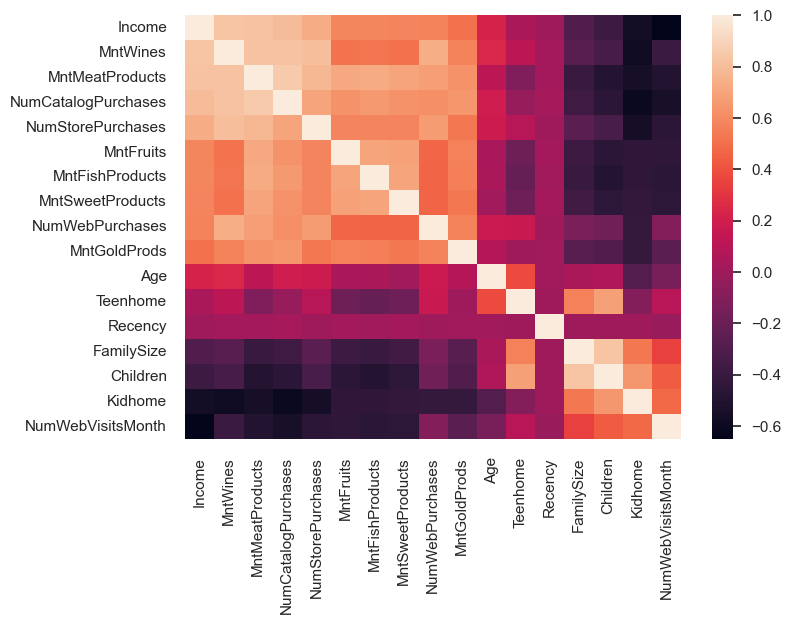

In [45]:
# Creating a correlation matrix between numerical columns and sorting them based on the 'Income' column.
# This heatmap shows that column 'Income' and columns from 'Product' and 'Place' categories are hightly correlated. (e.g. MntWines and MnrtMeatProducts are highly correlated)
# Keep in mind, correlation does not imply causation
cols_corrNumerical = df[list_numerical_].corr('spearman').nlargest(len(list_numerical_),'Income')['Income'].index
sns.heatmap(df[cols_corrNumerical].corr('spearman'))
plt.show()

In [46]:
listcols_product_ = [i for i in listcols_product if i != 'MntTotal']

In [47]:
# Creating correlation function that shows which 5 columns are highly correlated with the target column
def column_highCorr(targetCols):
    return df[list_numerical_].corr('spearman').nlargest(len(cols_corrNumerical),targetCols)[targetCols][1:]

# Creating a multi-index list of correlation values between products versus products and products versus places.
prod_corrTuplesIndex = [(i,j) for i in listcols_product_ for j in column_highCorr(i).index]
# Creating a list of correlation values between products versus products and products versus places.
prod_corrTuplesValues = [j for i in listcols_product_ for j in column_highCorr(i)]

# Categorizing the correlations.
id_CorrTIProd = []
id_CorrTIPlace = []
id_counter = 0

for i in prod_corrTuplesIndex:
    if i[1][:3]=='Mnt':
        id_CorrTIProd.append(id_counter)
    elif i[1][-9:]=='Purchases':
        id_CorrTIPlace.append(id_counter)
    id_counter+=1

CTIProd = [prod_corrTuplesIndex[i] for i in id_CorrTIProd]
CTVProd = [prod_corrTuplesValues[i] for i in id_CorrTIProd]

CTIPlace = [prod_corrTuplesIndex[i] for i in id_CorrTIPlace]
CTVPlace = [prod_corrTuplesValues[i] for i in id_CorrTIPlace]

In [48]:
# Creating the correlation rankings between products and products.
# This table will assist marketers in bundling their products effectively.

multiIndex_prodProd = pd.MultiIndex.from_tuples(CTIProd, names=['Product', 'HighCorrWith'])
df_prodHCProd = pd.DataFrame(CTVProd, index=multiIndex_prodProd, columns=['SpearmanCorr'])
df_prodHCProd = df_prodHCProd.loc['MntWines MntFruits MntMeatProducts MntFishProducts MntSweetProducts MntGoldProds'.split()]
df_prodHCProd

SpearmanCorr
Product          HighCorrWith                  
MntWines         MntMeatProducts       0.821428
                 MntGoldProds          0.570350
                 MntFishProducts       0.519970
                 MntFruits             0.514776
                 MntSweetProducts      0.506482
MntFruits        MntMeatProducts       0.711092
                 MntFishProducts       0.701521
                 MntSweetProducts      0.689415
                 MntGoldProds          0.562070
                 MntWines              0.514776
MntMeatProducts  MntWines              0.821428
                 MntFishProducts       0.723807
                 MntFruits             0.711092
                 MntSweetProducts      0.697588
                 MntGoldProds          0.630725
MntFishProducts  MntMeatProducts       0.723807
                 MntFruits             0.701521
                 MntSweetProducts      0.698725
                 MntGoldProds          0.557294
                 MntWines              0.519970
MntSweetProducts MntFishProducts       0.698725
                 MntMeatProducts       0.697588
                 MntFruits             0.689415
                 MntGoldProds          0.534342
                 MntWines              0.506482
MntGoldProds     MntMeatProducts       0.630725
                 MntWines              0.570350
                 MntFruits             0.562070
                 MntFishProducts       0.557294
                 MntSweetProducts      0.534342

In [49]:
# dfi.export(df_prodHCProd, "pic/df_prodHCProd.png")  # For readme markdown

In [50]:
# Creating the correlation rankings between products and places (channels).
# This table will assist marketers in using their channels ('Place') effectively.

multiIndex_prodPlace = pd.MultiIndex.from_tuples(CTIPlace, names=['Product', 'HighCorrWith'])
df_prodHCPlace = pd.DataFrame(CTVPlace, index=multiIndex_prodPlace, columns=['SpearmanCorr'])
df_prodHCPlace = df_prodHCPlace.loc['MntWines MntFruits MntMeatProducts MntFishProducts MntSweetProducts MntGoldProds'.split()]
df_prodHCPlace

SpearmanCorr
Product          HighCorrWith                     
MntWines         NumCatalogPurchases      0.820635
                 NumStorePurchases        0.802533
                 NumWebPurchases          0.738646
MntFruits        NumCatalogPurchases      0.631306
                 NumStorePurchases        0.578689
                 NumWebPurchases          0.470160
MntMeatProducts  NumCatalogPurchases      0.852054
                 NumStorePurchases        0.775522
                 NumWebPurchases          0.677354
MntFishProducts  NumCatalogPurchases      0.654631
                 NumStorePurchases        0.576812
                 NumWebPurchases          0.462657
MntSweetProducts NumCatalogPurchases      0.628977
                 NumStorePurchases        0.578191
                 NumWebPurchases          0.460811
MntGoldProds     NumCatalogPurchases      0.643284
                 NumWebPurchases          0.572444
                 NumStorePurchases        0.534402

In [108]:
# dfi.export(df_prodHCPlace, "pic/df_prodHCPlace.png")  # For readme markdown

In [52]:
df.head()

ID Education  Occupancy  isParent  Complain  Age   Income  Kidhome  Teenhome  Children  FamilySize Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  MntTotal  NumDealsPurchases  AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  \
0  5524        S1          1         0         0   57  58138.0        0         0         0           1  2012-04-09       58       635         88              546              172                88            88      1617                  3             0             0             0             0   
1  2174        S1          1         1         0   60  46344.0        1         1         2           3  2014-08-03       38        11          1                6                2                 1             6        27                  2             0             0             0             0   
2  4141        S1          2         0         0   49  71613.0        0         0         0           2  2013-08-21       26       426         49              127              111                21            42       776                  1             0             0             0             0   
3  6182        S1          2         1         0   30  26646.0        1         0         1           3  2014-10-02       26        11          4               20               10                 3             5        53                  2             0             0             0             0   
4  5324        S3          2         1         0   33  58293.0        1         0         1           3  2014-01-19       94       173         43              118               46                27            15       422                  5             0             0             0             0   

   AcceptedCmp5  Response  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  
0             0         1                8                   10                  4                  7  
1             0         0                1                    1                  2                  5  
2             0         0                8                    2                 10                  4  
3             0         0                2                    0                  4                  6  
4             0         0                5                    3                  6                  5

#### 02.06: Creating RF (Recency Frequency) Analysis

Since there is no column indicating the total revenue a customer spends in their lifetime, we can only conduct an **RF (Recency Frequency)** analysis instead of an **RFM (Recency Frequency Monetary)** analysis. 

[The Origin of RFM analysis](https://www.rejoiner.com/resources/rfm-analysis#:~:text=%5BR%5D%20Recency%20%E2%80%93%20Recency%20score,who%20have%20purchased%20less%20recently): RFM segmentation was initially employed by direct marketers who sent catalogs through direct mail in the 1930s and 1940s. Catalog companies used to maintain and update a 3×5 index card for each customer in their database. These index cards were then organized based on the customer's recency of purchase, frequency of purchases, and the total amount the customer had spent over their lifetime.

Time and again, they found that customers with high RFM scores were the most likely to respond positively to new catalog deliveries. Their primary goal in ranking customers in this manner was to avoid sending expensive print catalogs to customers who were unlikely to make a purchase.

For today's marketers, the cost of sending emails is negligible compared to the expenses associated with producing print catalogs in the 1930s. In 2018, wasteful marketing practices have other costs, such as irritating customers, increasing opt-out rates, damaging brand reputation, and most importantly, causing customer indifference.

1. **Recency** is measured in terms of the days since a customer's last purchase. Customers who have made more recent purchases are more likely to make another purchase compared to customers who haven't made a purchase in a longer time.
2. **Frequency** is the cumulative number of purchases a customer has made over their lifetime. Customers who purchase more frequently are more likely to make additional purchases compared to those who have purchased only once or less often.

In [53]:
df_check2 = df.copy()

# Breaking up the data using quintile-based binning since the data is not normally distributed.

# To create a Recency score using quintile-based binning, divide the dataset into 5 equal parts. 
# The customers with the lowest recency values (top 20%) receive a score of 5, the next 20% receive a score of 4, and so on.
df_check2['Rank_Recency'] = pd.qcut(df_check2['Recency'], 5, labels=np.arange(5,0,-1))

# To create a Frequency score through quintile-based binning, split the dataset into 5 equal segments. 
# Customers with the highest frequency values (top 20%) receive a score of 5, the next 20% receive a score of 4, and so forth.
df_check2['Rank_Frequency'] = pd.qcut(df_check2['MntTotal'], 5, labels=np.arange(1, 6))

# Concatenating the Recency Score and Frequency Score
df_check2['RF'] = (df_check2['Rank_Recency'].astype('str') + df_check2['Rank_Frequency'].astype('str')).astype('int32')

In [54]:
# Sorting the customer based on RF Score.

df_check2.sort_values('RF', ascending=False)

ID Education  Occupancy  isParent  Complain  Age   Income  Kidhome  Teenhome  Children  FamilySize Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  MntTotal  NumDealsPurchases  AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  \
288   10102        S1          1         0         0   48  79946.0        0         0         0           1  2014-12-05       19       395        183              565              166               141            28      1478                  1             0             0             0   
1864   9064        S1          2         0         0   32  69109.0        0         0         0           2  2012-09-11       10       823         25              459              124                29            95      1555                  1             0             0             0   
1089   7348        S3          1         0         0   56  71691.0        0         0         0           1  2014-03-17        0       336        130              411              240                32            43      1192                  1             0             0             0   
906   10150        S1          1         0         0   53  86429.0        0         0         0           1  2013-11-21       10       464         28              873               29                18            37      1449                  0             1             0             0   
1990  10949        S3          1         0         0   51  72968.0        0         0         0           1  2013-12-16        8      1092         37              592              145                37            55      1958                  1             1             0             0   
...     ...       ...        ...       ...       ...  ...      ...      ...       ...       ...         ...         ...      ...       ...        ...              ...              ...               ...           ...       ...                ...           ...           ...           ...   
954    8146        S2          2         1         0   38  46106.0        1         1         2           4  2014-11-05       84        30          0                8                2                 0            14        54                  1             0             0             0   
1685   7947        S1          2         1         0   45  42231.0        1         1         2           4  2014-03-25       99        24          0                8                0                 1             4        37                  1             0             0             0   
177   10854        S3          2         1         0   44  38853.0        1         1         2           4  2014-05-23       90        29          0               14                0                 0             2        45                  2             0             0             0   
1453   5975        S3          1         1         0   47  40304.0        1         0         1           2  2013-09-30       82        37          0               17                0                 0             3        57                  1             0             0             0   
1412    361        S2          2         1         0   45  43142.0        1         1         2           4  2014-02-18       84         5          1                7                2                 1             4        20                  1             0             0             0   

      AcceptedCmp4  AcceptedCmp5  Response  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth Rank_Recency Rank_Frequency  RF  
288              0             0         0                5                   11                  5                  3            5              5  55  
1864             0             1         1                6                    6                  7                  4            5              5  55  
1089             0             0         1                4          

Customer ranking is a dynamic process. A customer ranked 55 is currently the most recent and frequent, while a rank of 11 represents the opposite, indicating limited marketing potential. Recognizing changes in these rankings is crucial.

In [55]:
df_check2[df_check2['RF']==55]['ID'].count() # There are 84 customers who are the most recent and most frequent buyers.

84

#### 02.07: Analyzing the Relationship Between Number of Children, Number of Occupancy, and Total Spending.

In [56]:
df.pivot_table(index=df['Children'], columns=df['Occupancy'], values='MntTotal')

Occupancy            1            2
Children                           
0          1107.230159  1103.937008
1           462.007979   481.706757
2           239.446043   250.393502

The data reveals that as the number of children in a household increases, the total expenditure on items decreases. Additionally, customers who live with a partner tend to have a higher total expenditure on items compared to those who live alone.

## 03: KMeans Clustering

#### 03.01: Preprocessing

In [57]:
df.insert(df.columns.get_loc('MntTotal'), 'Frequency_Score', df_check2['Rank_Frequency'].astype('int64'))

In [58]:
df.head()

ID Education  Occupancy  isParent  Complain  Age   Income  Kidhome  Teenhome  Children  FamilySize Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  Frequency_Score  MntTotal  NumDealsPurchases  AcceptedCmp1  AcceptedCmp2  \
0  5524        S1          1         0         0   57  58138.0        0         0         0           1  2012-04-09       58       635         88              546              172                88            88                5      1617                  3             0             0   
1  2174        S1          1         1         0   60  46344.0        1         1         2           3  2014-08-03       38        11          1                6                2                 1             6                1        27                  2             0             0   
2  4141        S1          2         0         0   49  71613.0        0         0         0           2  2013-08-21       26       426         49              127              111                21            42                4       776                  1             0             0   
3  6182        S1          2         1         0   30  26646.0        1         0         1           3  2014-10-02       26        11          4               20               10                 3             5                1        53                  2             0             0   
4  5324        S3          2         1         0   33  58293.0        1         0         1           3  2014-01-19       94       173         43              118               46                27            15                3       422                  5             0             0   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  Response  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  
0             0             0             0         1                8                   10                  4                  7  
1             0             0             0         0                1                    1                  2                  5  
2             0             0             0         0                8                    2                 10                  4  
3             0             0             0         0                2                    0                  4                  6  
4             0             0             0         0                5                    3                  6                  5

In [59]:
list_categorical

['ID',
 'Education',
 'Occupancy',
 'isParent',
 'Complain',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'Response']

In [60]:
list_categorical.remove('ID')
list_categorical.remove('Complain')

In [61]:
list_categorical

['Education',
 'Occupancy',
 'isParent',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'Response']

In [62]:
list_numerical

['Age',
 'Income',
 'Kidhome',
 'Teenhome',
 'Children',
 'FamilySize',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'MntTotal',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth']

In [63]:
list_numerical.remove('Children')
list_numerical.remove('Dt_Customer')
list_numerical.remove('MntTotal')

# Adding the Frequency_Score by summing up the columns in the 'Product' category and binning them based on quintiles (where higher is better, 
# indicating that a higher score means customers spend on more items). The 'Frequency_Score' column is the same as the 'Rank_Frequency' column in the previous RF analysis.
list_numerical.insert(12,'Frequency_Score')

In [64]:
list_numerical

['Age',
 'Income',
 'Kidhome',
 'Teenhome',
 'FamilySize',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'Frequency_Score',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth']

In [65]:
list_categorical

['Education',
 'Occupancy',
 'isParent',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'Response']

In [66]:
# Creating transformer for the categorical columns
transformer1 = ColumnTransformer([
    ('OneHotEncoding', OneHotEncoder(drop='first'), list_categorical)   # Encoding the categorical features using OneHotEncoder, and activating the parameter drop='first' to remove multi collinearity
], remainder='passthrough')

# Creating pipelines before applying PCA
pipe1 = Pipeline([
    ('transfomer', transformer1),
    ('StandardScaler', StandardScaler()),  # Standardizing all columns, including both numerical and encoded categorical columns
])

df_transformed = pipe1.fit_transform(df[list_numerical+list_categorical])  # Transforming the DataFrame before applying PCA

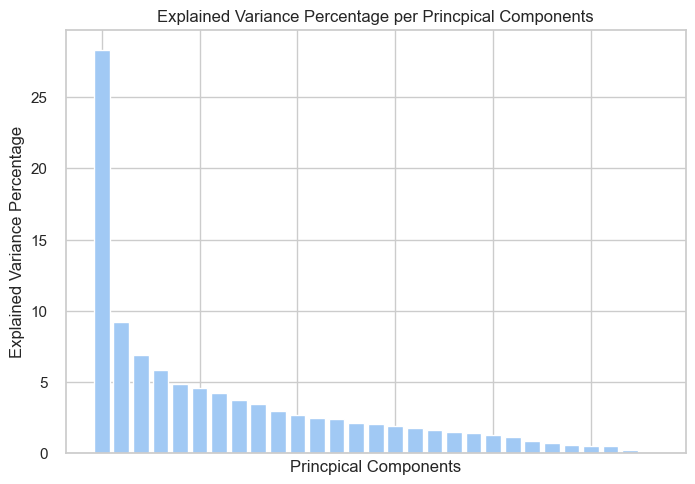

In [67]:
# Applying PCA to the transformed dataset to reduce its dimensionality
pca = PCA()
df_PCA = pd.DataFrame(pca.fit_transform(df_transformed), columns=range(29))

var = np.round(pca.explained_variance_ratio_*100, decimals=2)
labels = df_PCA.columns

plt.bar(x=labels, height=var)
plt.tick_params(axis='x', bottom=False, top=False, labelbottom=False)
plt.ylabel('Explained Variance Percentage')
plt.xlabel('Princpical Components')
plt.title("Explained Variance Percentage per Princpical Components")
plt.show()

In [68]:
print(f"Total explained variance percentage from 3 principal components: {round(np.sum(pca.explained_variance_ratio_[:3]*100),2)}%")

Total explained variance percentage from 3 principal components: 44.36%


We are going to use 3 principal components from PCA for KMeans Clustering.

In [69]:
df_compo = df_PCA[range(3)].copy()
df_compo.head()

0         1         2
0  4.534736 -1.020608 -0.751395
1 -2.835750 -0.261657 -0.464737
2  2.183796 -0.497741 -1.346259
3 -3.049880 -1.323304 -0.510923
4 -0.726647  0.643949 -0.025601

In [70]:
# We are going to standardize the components from the PCA since PCA only center the data, but not scale it. 
# Reference: Joshua Starmer (https://youtu.be/8A7L0GsBiLQ?feature=shared&t=2589)
scaler = StandardScaler()
kmeans_matrix = scaler.fit_transform(df_compo)

In [71]:
kmeans_matrix  # the dataset is ready for KMeans clustering, but before we do KMeans clustering, let's plot the data!

array([[ 1.58267445, -0.62527539, -0.53247373],
       [-0.98970908, -0.16030427, -0.32933453],
       [ 0.76216982, -0.30494118, -0.95402237],
       ...,
       [ 0.87828325, -0.74212409,  0.4865666 ],
       [ 0.51233016,  1.26178002, -0.40893426],
       [-0.80053694,  0.95666213,  1.21331006]])

In [72]:
# Creating an interactive 3D scatter plot using plotly
# Docs: https://plotly.com/python/3d-scatter-plots/
df_kmeans_scaled = pd.DataFrame(kmeans_matrix, columns='X Y Z'.split())  # Creating DataFrame from the kmeans_matrix

fig = px.scatter_3d(data_frame=df_kmeans_scaled, x='X', y='Y', z='Z', size_max=5, width=800, height=800)
fig.show()

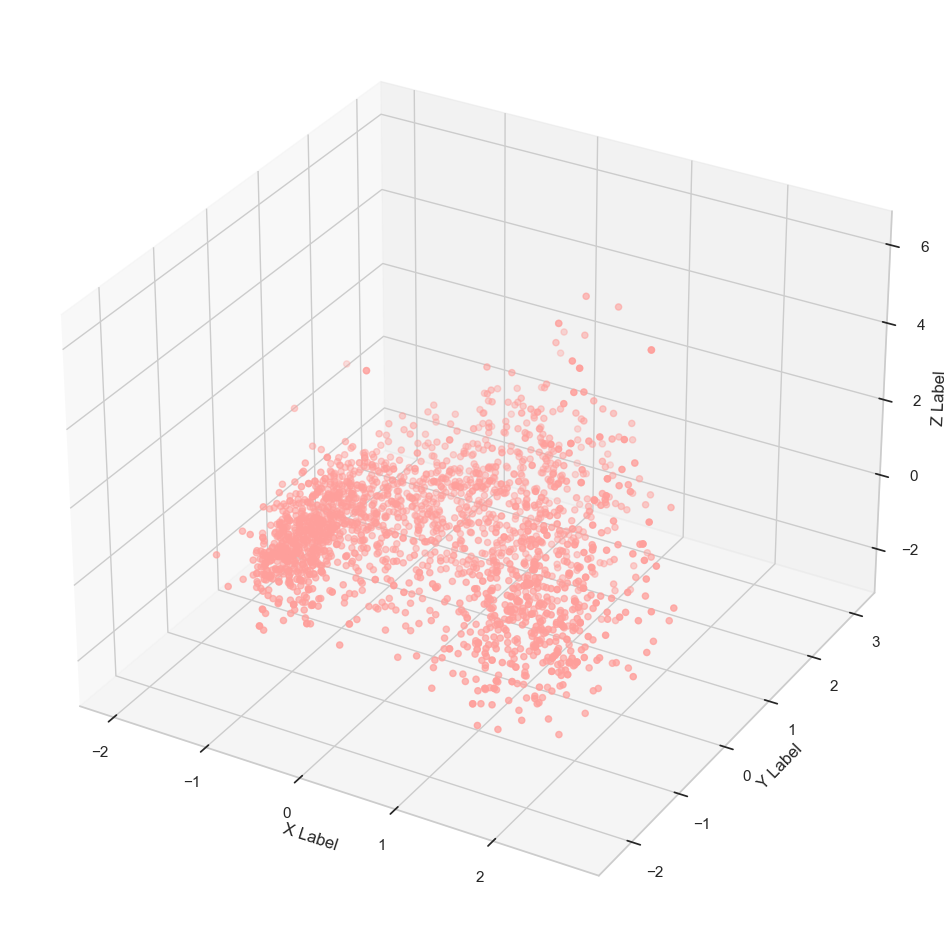

In [73]:
# Creating a 3D scatter plot to visualize the PCA components
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_kmeans_scaled['X'], df_kmeans_scaled['Y'], df_kmeans_scaled['Z'], c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

#### 03.02: Clustering with KMeans

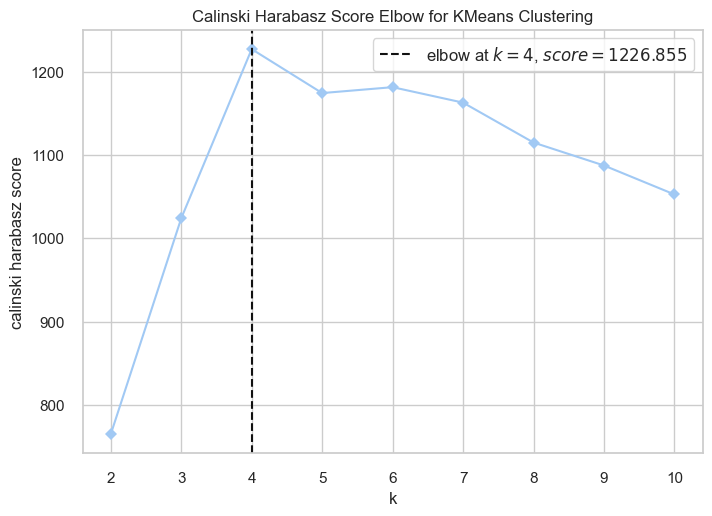

In [74]:
# Creating KMeans clustering and deciding which is the optimal number of "K" with elbow method
# Docs: https://www.scikit-yb.org/en/latest/api/cluster/elbow.html
model = KMeans(random_state=RANDOM_STATE)
visualizer = KElbowVisualizer(
    model, k=10, metric='calinski_harabasz', timings=False
)

visualizer.fit(df_kmeans_scaled)
visualizer.show()
plt.show()

It can be observed from the Elbow Plot above that the optimal value of K is 4; however, I will reevaluate the optimal value of "K" using the Silhouette Score.

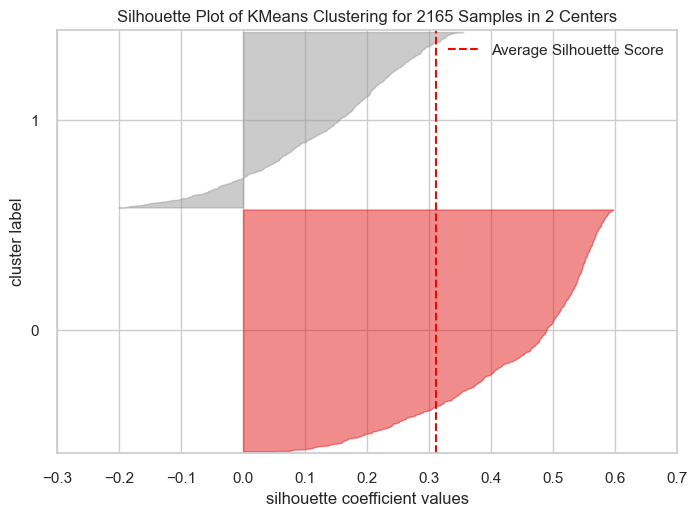

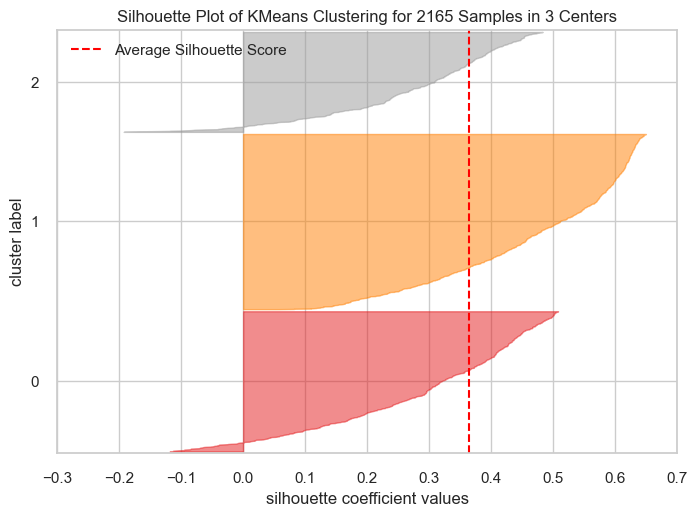

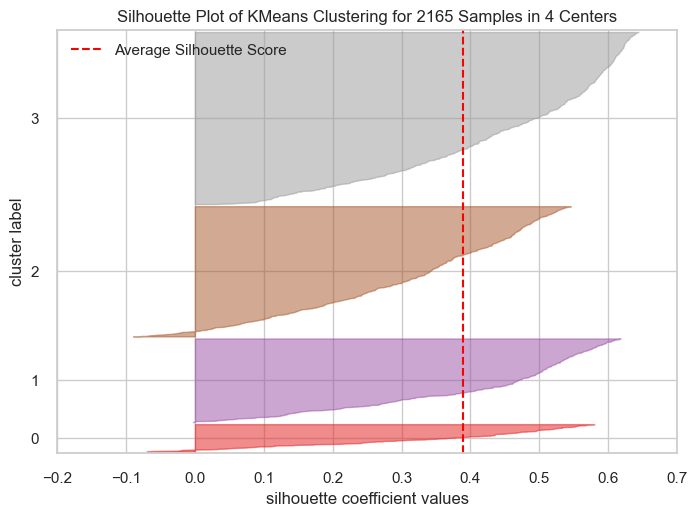

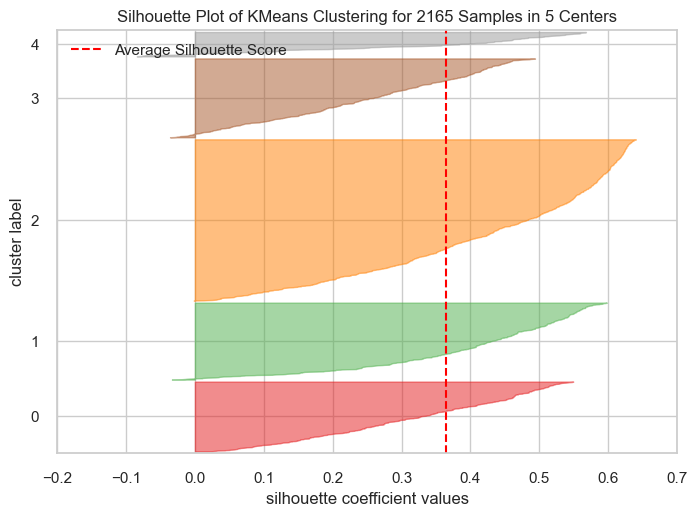

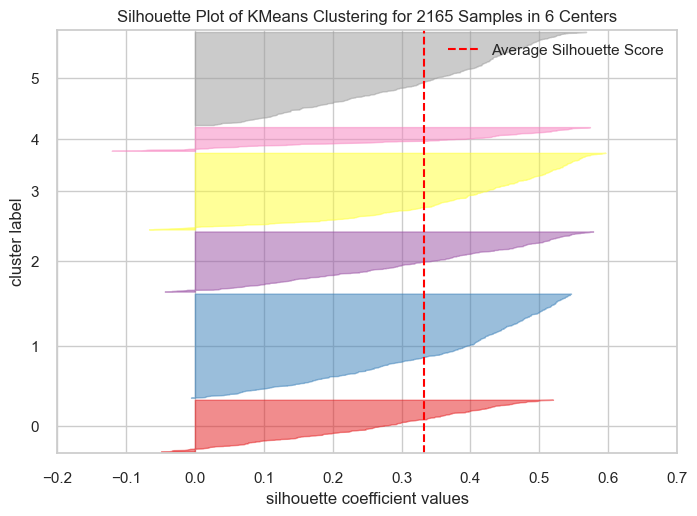

In [75]:
possible_K_list = range(2, 7)  # We are testing the optimal value of K within the range of 2 to 6.
for i in possible_K_list:
    silh_visualizer = SilhouetteVisualizer(KMeans(n_clusters=i, random_state=RANDOM_STATE))
    silh_visualizer.fit(df_kmeans_scaled)    
    silh_visualizer.show()

According to the silhouette plots above, a K value of 4 yields the highest silhouette score while still maintaining a relatively low number of misclusters.

In [76]:
kmeans = KMeans(n_clusters=4, random_state=RANDOM_STATE)
kmeans.fit(df_kmeans_scaled)

KMeans(n_clusters=4, random_state=2023)

In [77]:
df_clustered_kmeans =df.copy()
df_clustered_kmeans.head()

ID Education  Occupancy  isParent  Complain  Age   Income  Kidhome  Teenhome  Children  FamilySize Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  Frequency_Score  MntTotal  NumDealsPurchases  AcceptedCmp1  AcceptedCmp2  \
0  5524        S1          1         0         0   57  58138.0        0         0         0           1  2012-04-09       58       635         88              546              172                88            88                5      1617                  3             0             0   
1  2174        S1          1         1         0   60  46344.0        1         1         2           3  2014-08-03       38        11          1                6                2                 1             6                1        27                  2             0             0   
2  4141        S1          2         0         0   49  71613.0        0         0         0           2  2013-08-21       26       426         49              127              111                21            42                4       776                  1             0             0   
3  6182        S1          2         1         0   30  26646.0        1         0         1           3  2014-10-02       26        11          4               20               10                 3             5                1        53                  2             0             0   
4  5324        S3          2         1         0   33  58293.0        1         0         1           3  2014-01-19       94       173         43              118               46                27            15                3       422                  5             0             0   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  Response  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  
0             0             0             0         1                8                   10                  4                  7  
1             0             0             0         0                1                    1                  2                  5  
2             0             0             0         0                8                    2                 10                  4  
3             0             0             0         0                2                    0                  4                  6  
4             0             0             0         0                5                    3                  6                  5

In [78]:
df_clustered_kmeans['label'] = kmeans.labels_  # Inserting the labels from KMeans Clustering

#### 03.03: Analyzing the KMeans Clusters

Note: Throughout this analysis, I will use the terms label, cluster, or segmented customer interchangeably.

*03.03a: Clusters Analysis*

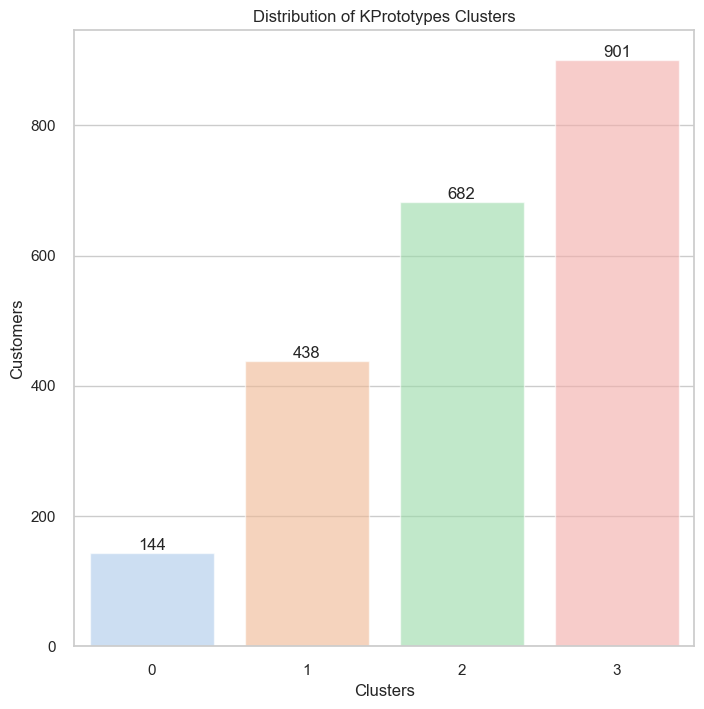

In [79]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x=df_clustered_kmeans['label'], alpha=.6)
ax.bar_label(ax.containers[0])  # plot the values on each bar
plt.title('Distribution of KPrototypes Clusters')
plt.xlabel('Clusters')
plt.ylabel('Customers')
plt.show()

It can be observed from the count plot above that cluster 3 has the largest number of customers, while cluster 0 has the smallest number of customers.

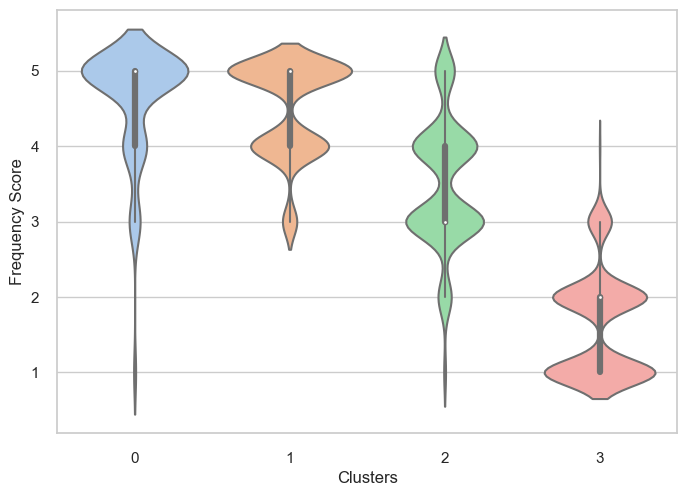

In [80]:
sns.violinplot(x=df_clustered_kmeans['label'], y=df_clustered_kmeans['Frequency_Score'], alpha=.6)
plt.xlabel('Clusters')
plt.ylabel('Frequency Score')
plt.show()

The violin plot above illustrates that clusters 0 and 1 consist of high-spending customers, while clusters 2 and 3 comprise medium-spending and low-spending customers, respectively.

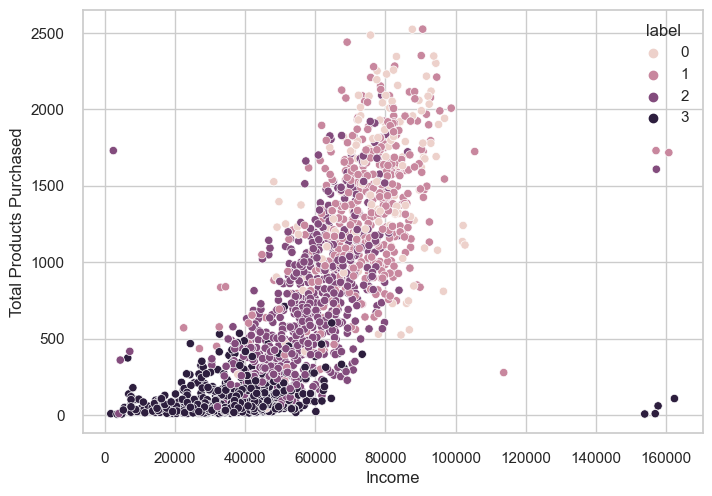

In [81]:
sns.scatterplot(x=df_clustered_kmeans['Income'], y=df_clustered_kmeans['MntTotal'], hue=df_clustered_kmeans['label'])
plt.ylabel('Total Products Purchased')
plt.show()

The scatter plot indicates that clusters 0 and 1 represent high-earning and high-spending customers. Additionally, cluster 2 corresponds to middle-income customers who are moderate spenders. Furthermore, cluster 3 represents low-income customers who purchase a relatively small number of products.

*03.03b: Marketing Product Analysis*

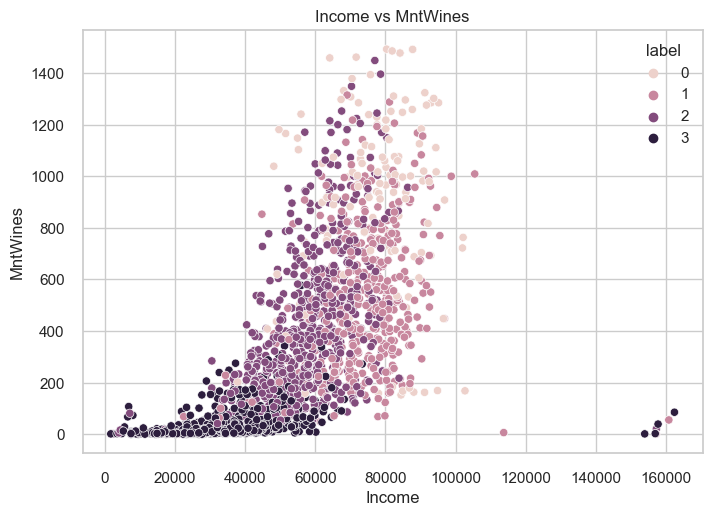

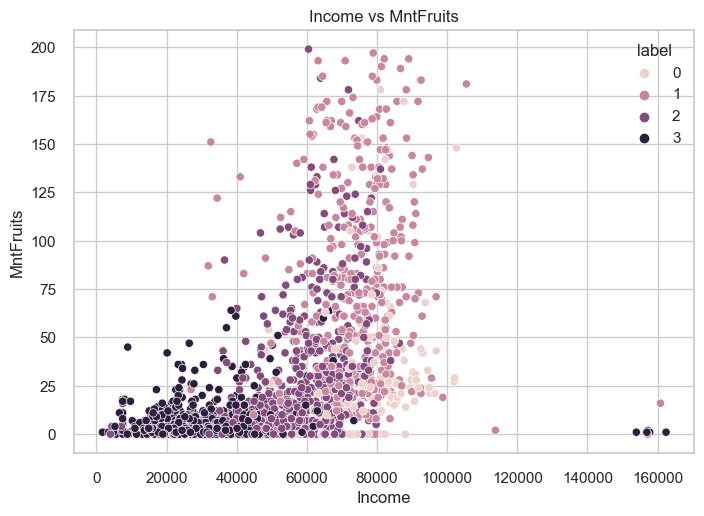

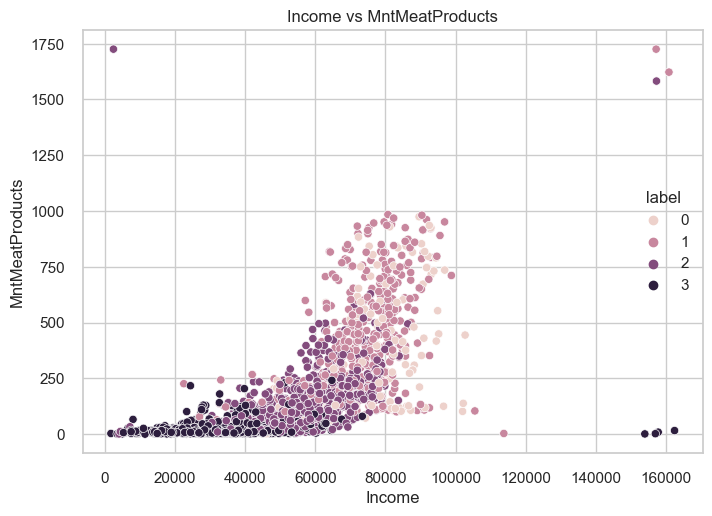

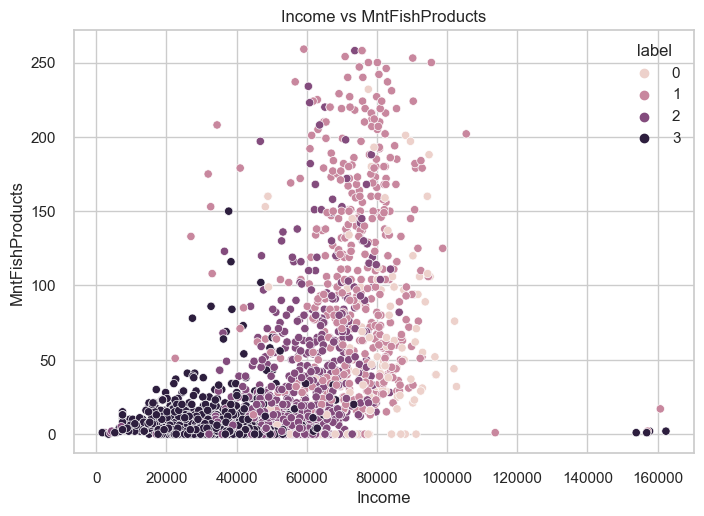

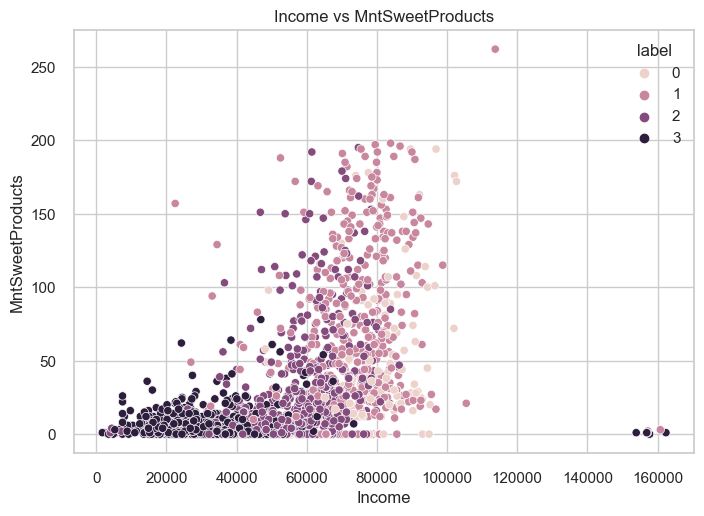

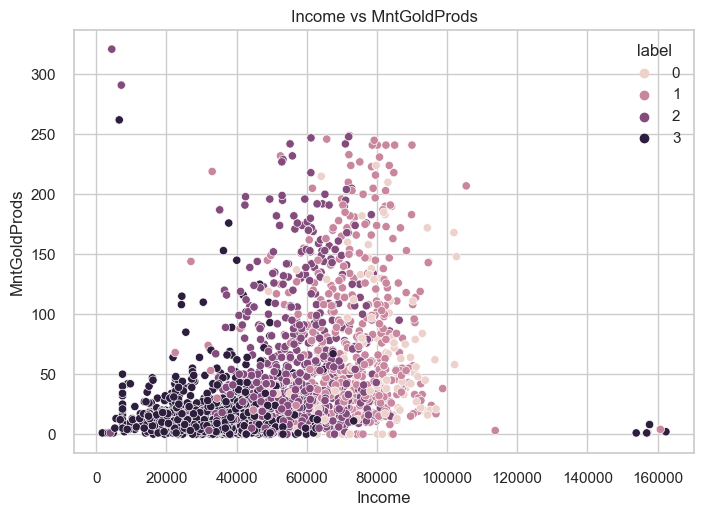

In [82]:
# Diving deeper into the relationship between 'Income' and 'Amount of Products Purchased' based on specific items.
for i in listcols_product[:-1]:
    sns.scatterplot(x=df_clustered_kmeans['Income'], y=df_clustered_kmeans[i], hue=df_clustered_kmeans['label'])
    plt.title(f"Income vs {i}")
    plt.show()

Cluster 0 shows a clear inclination towards purchasing wine products above others. Cluster 1 stands out as the primary consumer of fruit, meat, fish, and sweet products. Meanwhile, clusters 2 and 3 maintain relatively moderate and low expenditure, respectively, within this product category.

*03.03c: Marketing Channels Analysis*

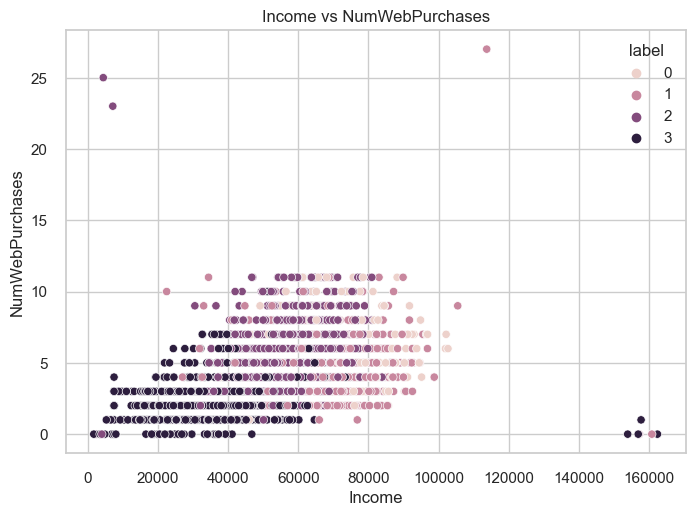

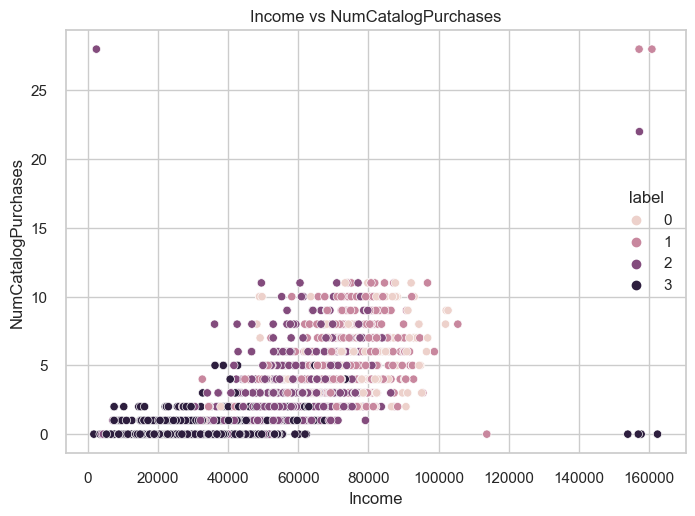

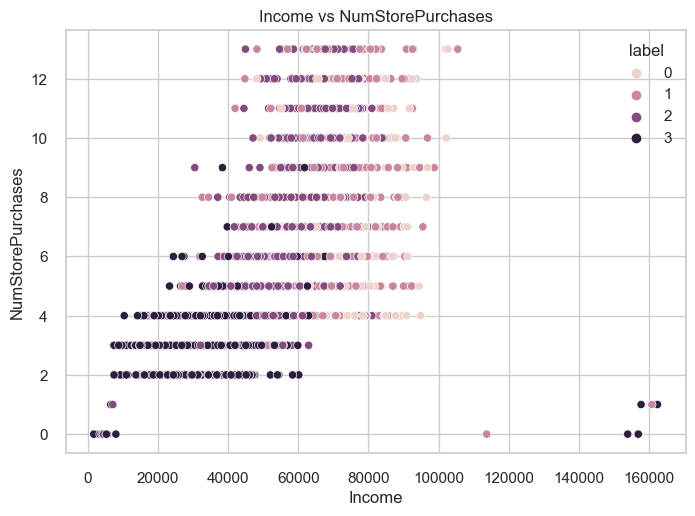

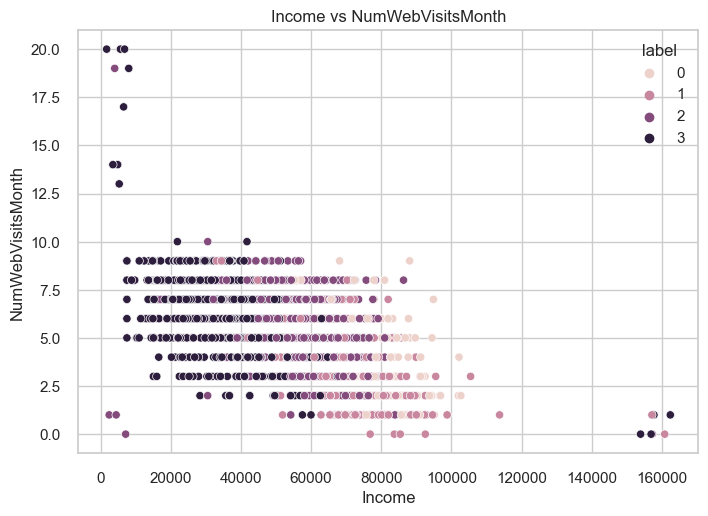

In [83]:
# Examining the relationship between our segmented customers' income and features within the 'Place' category
for i in listcols_place:
    sns.scatterplot(x=df_clustered_kmeans['Income'], y=df_clustered_kmeans[i], hue=df_clustered_kmeans['label'])
    plt.title(f"Income vs {i}")
    plt.show()

The scatter plots reveal that clusters 0, 1, and 2 dominate in web, catalog, and in-store purchases, whereas cluster 3 excels in the number of monthly web visits. Consequently, it can be inferred that cluster 3 consists of customers who engage in window shopping behavior.

#### 03.04: Profiling the KMeans Clusters
Using Median confidence interval and mode

In [84]:
# Creating a profile based on the median confidence interval, as most of the data are not normally distributed (some data are heavily skewed). 
# The mean confidence interval is highly sensitive to outliers; thus, we are going to use the median confidence interval instead.
# This median confidence interval is based on the Z-statistic. If the sample size is above 30, we can use the Z-statistic.
# https://www.statology.org/confidence-interval-for-median/
def median_confidenceInterval(array, confidence):
    mean = np.mean(array)
    median = np.median(array)
    n = len(array)  # Len of the array
    q = 0.5  # The quantile of interest, median = 0.5
    z = stats.norm.ppf((1+confidence)/2)
    return median, n, q, z, mean

# Creating a function that returns the lower bound of median confidence interval
def median_confidenceInterval_lower(array, confidence=.95):
    median, n, q, z, mean = median_confidenceInterval(array, confidence)
    j = math.ceil((n*q)-z*math.sqrt((n*q*(1-q))))  # lower bound interval index
    result_lower = array[j]  # median lower bound
    return result_lower

# Creating a function that returns the upper bound of median confidence interval
def median_confidenceInterval_upper(array, confidence=.95):
    median, n, q, z, mean = median_confidenceInterval(array, confidence)
    k = math.ceil((n*q)+z*math.sqrt((n*q*(1-q))))  # Upper bound interval index
    result_upper = array[k]  # median upper bound
    return result_upper

# Creating function that removes duplicates in the intervals (e.g. interval '7 - 7' becomes '7')
def RemoveIntervalDuplicates(df):
    df_tidied = pd.DataFrame()
    try: 
        for i in df.columns:
            df_tidied[i] = df[i].str.split(' - ').apply(lambda x: x[0] if x[0] == x[1] else ' - '.join(x))
    except:
        print('Try generating the dataframe again if an error arises.')
    return df_tidied

In [85]:
# Create a function that manually groups the Data Frame and applies the median_confidenceInterval functions (both lower bound and upper bound functions),
# Since applying these functions to grouped DataFrame using pandas 'groupby' function yields to undesirable results.
def profile_generator(df):
    df_medianLower = pd.DataFrame()
    df_medianUpper = pd.DataFrame()

    for label in np.sort(df['label'].unique()):
        for column in list_numerical:
            arr_sorted = np.sort(df[df['label']==label][column].to_numpy())

            median_lowerbound = median_confidenceInterval_lower(arr_sorted)
            df_medianLower.loc[label, column] = median_lowerbound

            median_upperbound = median_confidenceInterval_upper(arr_sorted)
            df_medianUpper.loc[label, column] = median_upperbound

    df_medianLower = df_medianLower.astype('int64')
    df_medianUpper = df_medianUpper.astype('int64')

    df_numerGB_MedianCI = df_medianLower.astype('str') + ' - ' + df_medianUpper.astype('str')  # Creating profiling based on the 'median' confidence interval of the data.
    
    df_numerGB_MedianCI = RemoveIntervalDuplicates(df_numerGB_MedianCI)
    df_categoGB_Mode = df[list_categorical+['label']].groupby('label').agg(pd.Series.mode)
    df_result = pd.concat([df_numerGB_MedianCI.reset_index(drop=True), df_categoGB_Mode.reset_index(drop=True)], axis=1)
    return df_result

In [86]:
profile_generator(df_clustered_kmeans)

Age         Income Kidhome Teenhome FamilySize  Recency    MntWines MntFruits MntMeatProducts MntFishProducts MntSweetProducts MntGoldProds Frequency_Score NumDealsPurchases NumWebPurchases NumCatalogPurchases NumStorePurchases NumWebVisitsMonth Education  Occupancy  isParent  AcceptedCmp2  \
0  42 - 48  75777 - 81205       0        0          2  36 - 55  912 - 1006   21 - 27       273 - 414         29 - 45          24 - 38      38 - 46               5                 1           5 - 6               5 - 6             7 - 8             3 - 5        S3          2         0             0   
1  44 - 48  73450 - 76081       0        0          2  49 - 57   450 - 521   54 - 70       396 - 445        86 - 104          54 - 66      53 - 68               5                 1           4 - 5               5 - 6             8 - 9                 2        S1          2         0             0   
2  49 - 51  56721 - 59052       0        1          3  46 - 51   322 - 381   10 - 14        97 - 114         13 - 19          10 - 14      35 - 41           3 - 4                 3               6               2 - 3                 7                 6        S1          2         1             0   
3  39 - 41  31928 - 34176       1        0          3  46 - 51     16 - 20     2 - 3         13 - 15           3 - 4            2 - 3       9 - 10           1 - 2             1 - 2               2                   0                 3                 7        S1          2         1             0   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  Response  
0             0             1             1         1  
1             0             0             0         0  
2             0             0             0         0  
3             0             0             0         0

The table above presents the segmented customer profile, illustrating the inclinations of each profiled customer in various features. Tendencies for numerical values are determined using the median confidence interval due to the non-normal distribution of the data, while categorical features are assessed based on the mode. It is also important to remember that to classify future customers, it is best to use the labels from KMeans clustering.

*Note: The index represents cluster profiles, while the columns represent features.*

In [87]:
# # For Readme Markdown
# Kmeans_df_md = profile_generator(df_clustered_kmeans)
# Kmeans_df_md = Kmeans_df_md.iloc[:,:Kmeans_df_md.columns.get_loc('isParent')+1]

# Kmeans_df_md1 = Kmeans_df_md.iloc[:,:12]
# dfi.export(Kmeans_df_md1, "pic/Kmeans_df_md1.png")
# Kmeans_df_md2 = Kmeans_df_md.iloc[:,12:]
# dfi.export(Kmeans_df_md2, "pic/Kmeans_df_md2.png")

*Before we move on to KPrototypes clustering, **let's see the Kmeans labels in scatter plots:***

In [88]:
df_kmeans_scaled.insert(3, 'label', kmeans.labels_)

In [89]:
fig = px.scatter_3d(data_frame=df_kmeans_scaled, x='X', y='Y', z='Z', color='label', size_max=5, width=800, height=800)
fig.show(width=100, height=100)

## 04: KPrototypes Clustering

#### 04.01: Preprocessing

In [90]:
scaler = StandardScaler()
numerical_std = scaler.fit_transform(df[list_numerical])  # Numerical values need to be standardized first since they are in different scales.
df_numerical_std = pd.DataFrame(numerical_std, columns=scaler.get_feature_names_out())
df_categorical = df[list_categorical]  # Categorical variables do not need to be encoded when using KPrototypes Algorithm

df_combined = pd.concat([df_numerical_std.reset_index(drop=True), df_categorical.reset_index(drop=True)], axis=1)

In [91]:
# I will not perform PCA before clustering. 
# Instead, I will simply standardize the numerical columns, transform the entire dataset into a matrix (numpy array), and then feed the data into the KPrototypes.
df_matrix = df_combined.to_numpy()

In [92]:
df_matrix.shape

(2165, 27)

In [93]:
categorical_id = [df_combined.columns.get_loc(i) for i in list_categorical]

#### 04.02: Clustering with KPrototypes

Clustering with K: 1
Clustering with K: 2
Clustering with K: 3
Clustering with K: 4
Clustering with K: 5
Clustering with K: 6
Clustering with K: 7
Clustering with K: 8
Clustering with K: 9


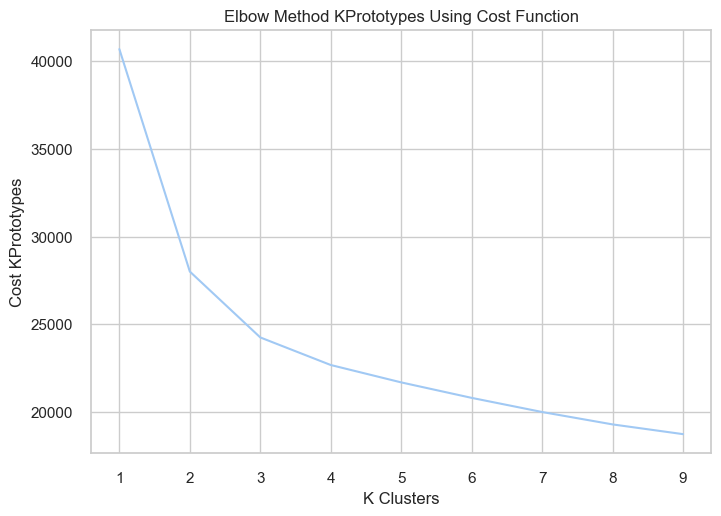

In [94]:
cost = []
for cluster in range(1, 10):
    try:
        kprototype = KPrototypes(n_jobs = -1, n_clusters=cluster, init='Huang', random_state=RANDOM_STATE)
        kprototype.fit_predict(df_matrix, categorical=categorical_id)
        cost.append(kprototype.cost_)
        print(f'Clustering with K: {cluster}')
    except:
        break

plt.plot(range(1,10), cost)
plt.xlabel('K Clusters')
plt.ylabel('Cost KPrototypes')
plt.title('Elbow Method KPrototypes Using Cost Function')
plt.show()

In [95]:
# Creating Knee Locator to find the best K for KPrototypes clustering.
# https://pypi.org/project/kneed/#documentation
# https://kneed.readthedocs.io/en/stable/

cost_kneeLocator = KneeLocator(x=range(1,10), y=cost, curve='convex', direction='decreasing', online=True)
print(f"The Best K for the KPrototypes Clustering: {cost_kneeLocator.elbow} clusters")

The Best K for the KPrototypes Clustering: 3 clusters


In [96]:
kprototype = KPrototypes(n_jobs = -1, n_clusters=3, init='Huang', random_state=RANDOM_STATE)
label = kprototype.fit_predict(df_matrix, categorical=categorical_id)

In [97]:
df_clustered_kproto = df.copy()

In [98]:
df_clustered_kproto['label'] = label  # Inserting the label from the KPrototypes clustering.

#### 04.03: Analyzing the KPrototypes Clusters

*04.03a: Clusters Analysis*

Note: Throughout this analysis, I will use the terms label, cluster, or segmented customer interchangeably.

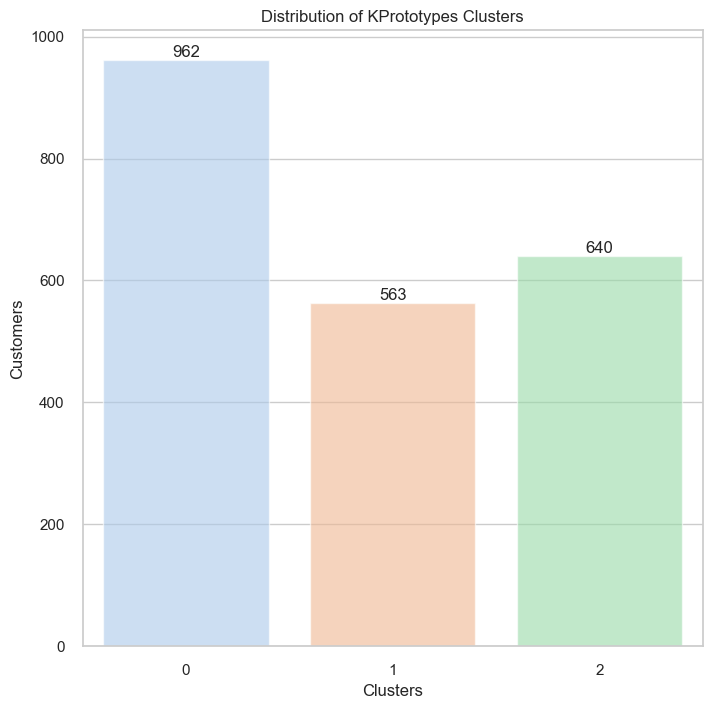

In [99]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x=df_clustered_kproto['label'], alpha=.6)
ax.bar_label(ax.containers[0])  # plot the values on each bar
plt.title('Distribution of KPrototypes Clusters')
plt.xlabel('Clusters')
plt.ylabel('Customers')
plt.show()

It can be seen through the count plot above that clusters 1 and 2 have a similar number of customers, while cluster 3 has the most customers, totaling 962 customers.

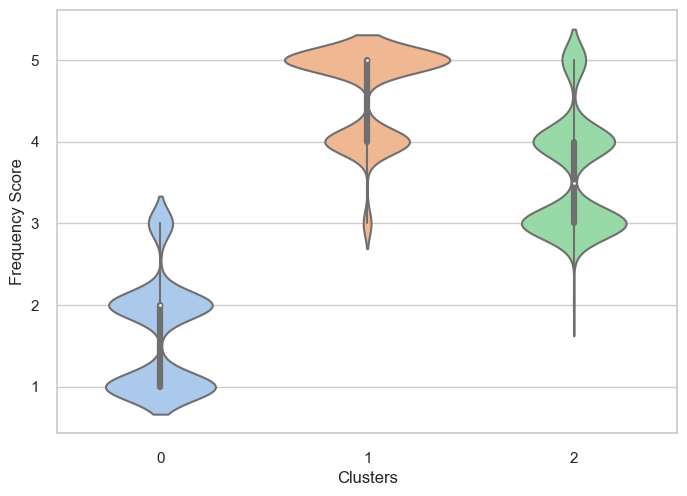

In [100]:
sns.violinplot(x=df_clustered_kproto['label'], y=df_clustered_kproto['Frequency_Score'])
plt.xlabel('Clusters')
plt.ylabel('Frequency Score')
plt.show()

The violin plot provides valuable insights into customer purchasing behavior within the identified clusters. Notably, clusters 1 and 2 exhibit relatively high frequency scores, indicating that these customers tend to buy more products. Cluster 1, in particular, stands out as having the highest purchasing frequency. On the other hand, customers in cluster 0 appear to have a lower propensity to buy products in comparison to their counterparts in other clusters.

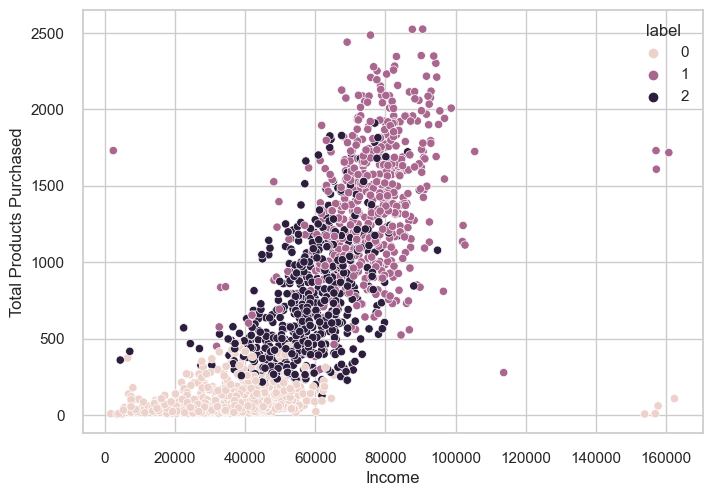

In [101]:
sns.scatterplot(x=df_clustered_kproto['Income'], y=df_clustered_kproto['MntTotal'], hue=df_clustered_kproto['label'])
plt.ylabel('Total Products Purchased')
plt.show()

Based on the scatter plot above, 
1. **Cluster 0** comprises low-income customers who purchase a relatively small quantity of products
2. **Cluster 1** consists of high-income customers who procure a substantial volume of products
3. **Cluster 2** represents medium-income customers who purchase a moderate quantity of products

*04.03b: Marketing Product Analysis*

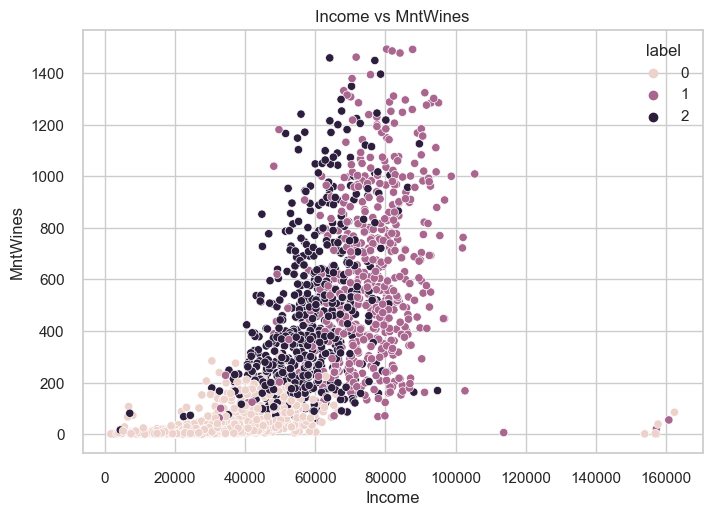

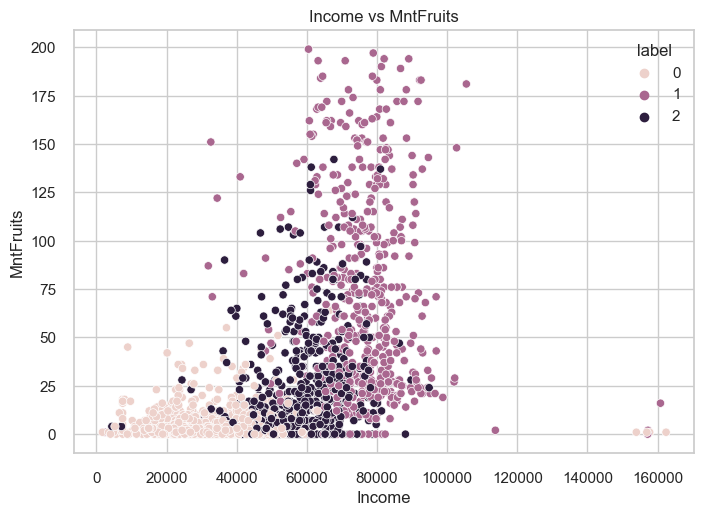

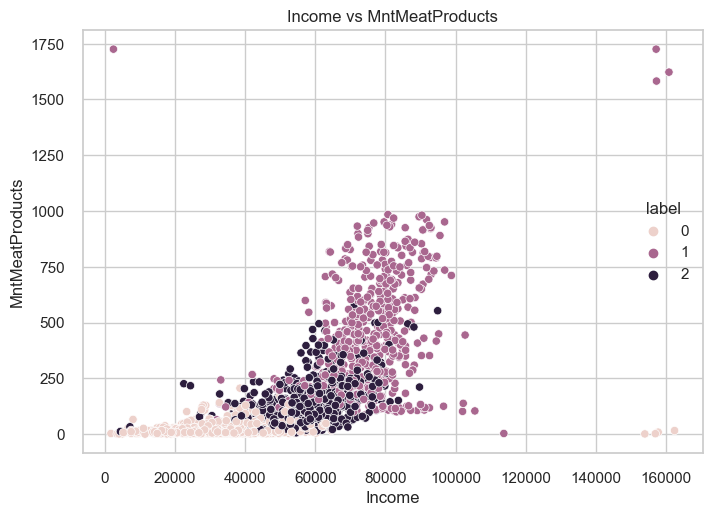

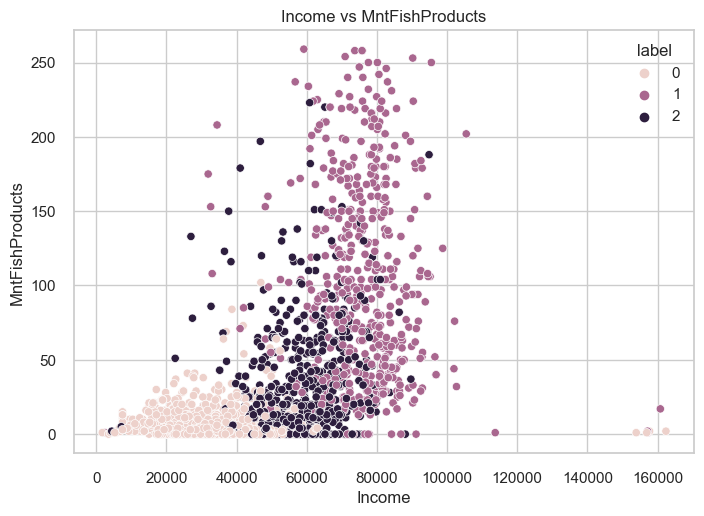

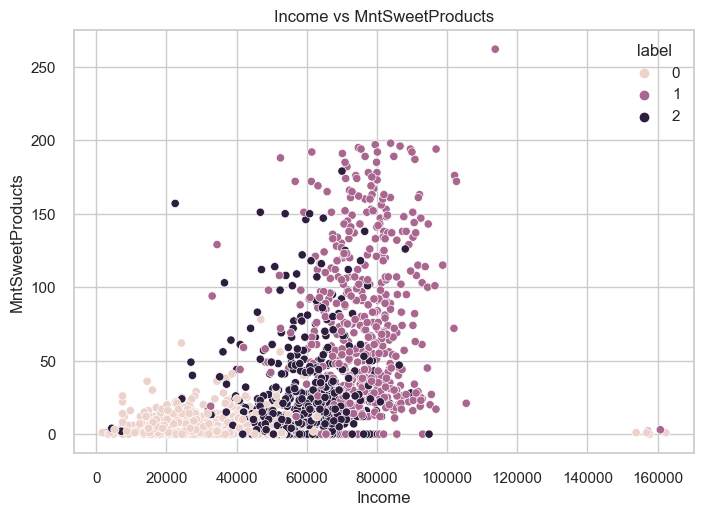

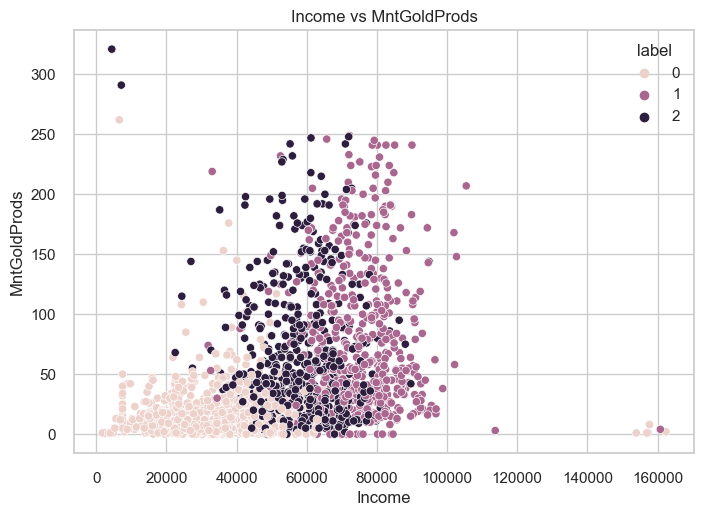

In [102]:
# Diving deeper into the relationship between 'Income' and 'Amount of Products Purchased' based on specific items.
for i in listcols_product[:-1]:
    sns.scatterplot(x=df_clustered_kproto['Income'], y=df_clustered_kproto[i], hue=df_clustered_kproto['label'])
    plt.title(f"Income vs {i}")
    plt.show()

Through these scatter plots, we can observe the buying patterns of our segmented customers based on the type of products they purchase and their income. It is also interesting to note that there is not much difference between segments 1 and 2 in their purchases of wines and gold products.

*04.03c: Marketing Channels Analysis*

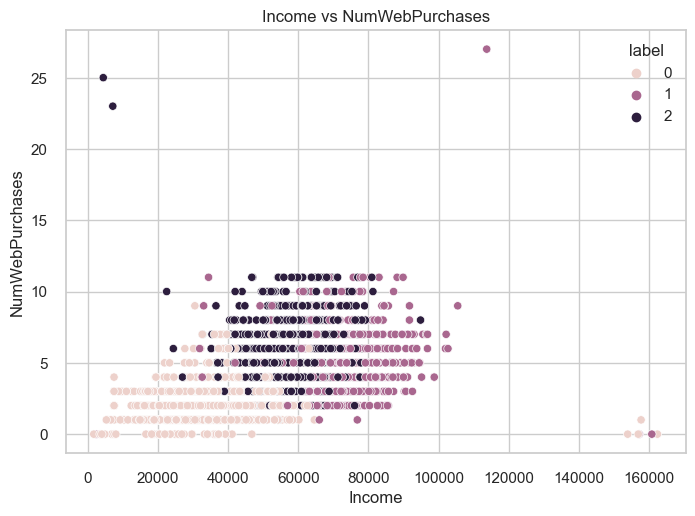

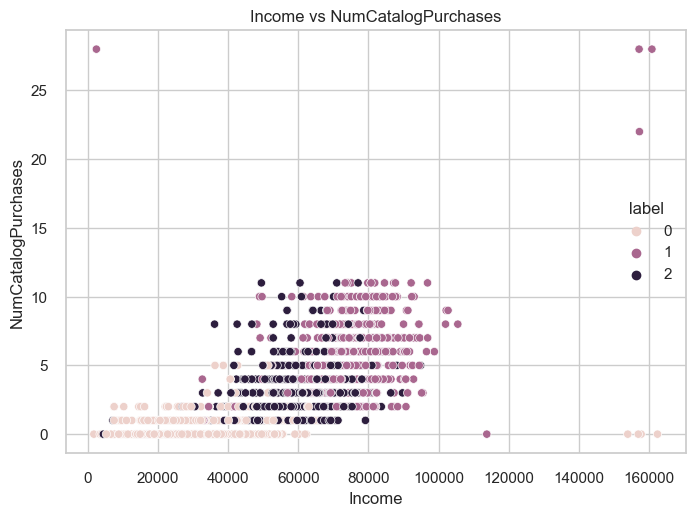

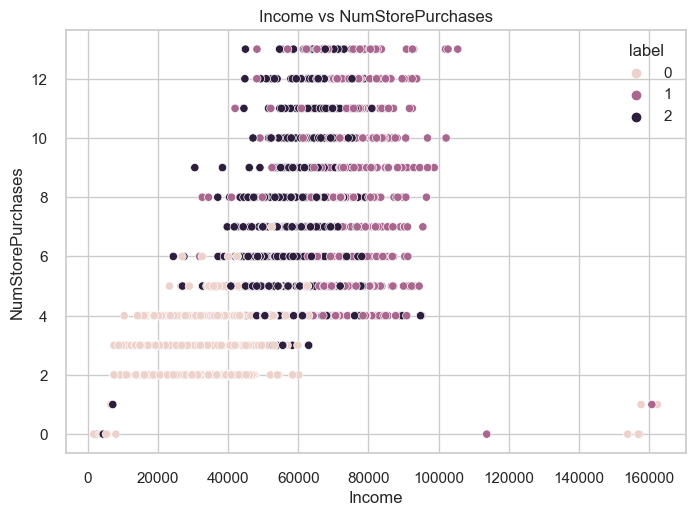

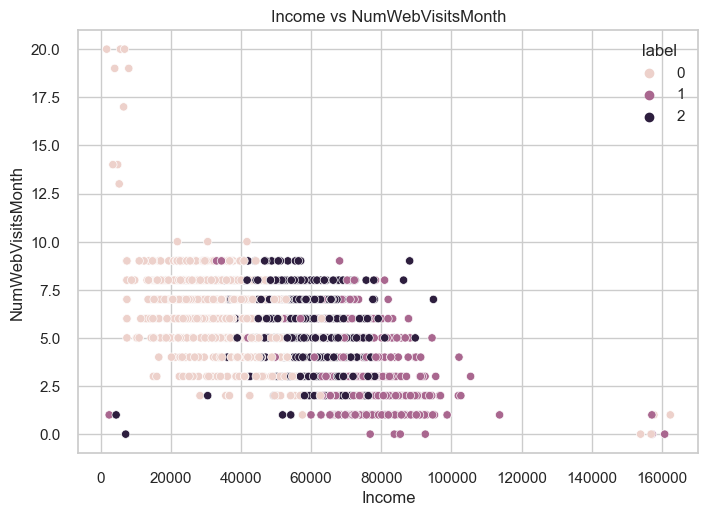

In [103]:
# Examining the relationship between our segmented customers' income and features within the 'Place' category
for i in listcols_place:
    sns.scatterplot(x=df_clustered_kproto['Income'], y=df_clustered_kproto[i], hue=df_clustered_kproto['label'])
    plt.title(f"Income vs {i}")
    plt.show()

The scatter plot above reveals that clusters 1 and 2 are the primary purchasers of products in-store, via catalog, and on the web. Conversely, cluster 0 customers exhibit a higher frequency of web visits per month but tend to spend relatively less on products. This suggests that cluster 0 customers are more inclined towards window shopping. 

Notably, between clusters 1 and 2, cluster 2 demonstrates higher web-based purchase dominance, while cluster 1 shows a preference for catalog purchases. Furthermore, the number of in-store purchases between these two clusters is relatively similar.

#### 04.04: Profiling the KPrototypes Clusters
Using Median confidence interval and mode

In [104]:
df_clustered_kproto.head()

ID Education  Occupancy  isParent  Complain  Age   Income  Kidhome  Teenhome  Children  FamilySize Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  Frequency_Score  MntTotal  NumDealsPurchases  AcceptedCmp1  AcceptedCmp2  \
0  5524        S1          1         0         0   57  58138.0        0         0         0           1  2012-04-09       58       635         88              546              172                88            88                5      1617                  3             0             0   
1  2174        S1          1         1         0   60  46344.0        1         1         2           3  2014-08-03       38        11          1                6                2                 1             6                1        27                  2             0             0   
2  4141        S1          2         0         0   49  71613.0        0         0         0           2  2013-08-21       26       426         49              127              111                21            42                4       776                  1             0             0   
3  6182        S1          2         1         0   30  26646.0        1         0         1           3  2014-10-02       26        11          4               20               10                 3             5                1        53                  2             0             0   
4  5324        S3          2         1         0   33  58293.0        1         0         1           3  2014-01-19       94       173         43              118               46                27            15                3       422                  5             0             0   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  Response  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  label  
0             0             0             0         1                8                   10                  4                  7      1  
1             0             0             0         0                1                    1                  2                  5      0  
2             0             0             0         0                8                    2                 10                  4      1  
3             0             0             0         0                2                    0                  4                  6      0  
4             0             0             0         0                5                    3                  6                  5      2

In [105]:
# Creating customer profile based on KPrototypes Clustering.
profile_generator(df_clustered_kproto)

Age         Income Kidhome Teenhome FamilySize  Recency   MntWines MntFruits MntMeatProducts MntFishProducts MntSweetProducts MntGoldProds Frequency_Score NumDealsPurchases NumWebPurchases NumCatalogPurchases NumStorePurchases NumWebVisitsMonth Education  Occupancy  isParent  AcceptedCmp1  \
0  40 - 42  33168 - 34728       1        0          3  46 - 51    18 - 23     2 - 3         13 - 15           3 - 4            2 - 3       9 - 11               2                 2               2                   0                 3                 7        S1          2         1             0   
1  44 - 47  75276 - 77520       0        0          2  47 - 56  521 - 587   51 - 63       403 - 445         80 - 99          53 - 64      53 - 63               5                 1               5               5 - 6             8 - 9             2 - 3        S1          2         0             0   
2  48 - 50  57338 - 59462       0        1          3  46 - 52  368 - 411   11 - 15       102 - 122         15 - 20          11 - 14      38 - 45           3 - 4                 3               6               2 - 3             7 - 8                 6        S1          2         1             0   

   AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  Response  
0             0             0             0             0         0  
1             0             0             0             0         0  
2             0             0             0             0         0

This table summarizes the customer segmentation profiles using KPrototypes algorithm. The numerical features use median confidence interval while the categorical features use mode. To classify future customers, please use labels from K-Prototypes Clustering.

*Note: The index represents cluster profiles, while the columns represent features.*

In [112]:
# # For Readme Markdown
# Kproto_df_md = profile_generator(df_clustered_kproto)
# Kproto_df_md = Kproto_df_md.iloc[:,:Kproto_df_md.columns.get_loc('isParent')+1]

# Kproto_df_md1 = Kproto_df_md.iloc[:,:12]
# dfi.export(Kproto_df_md1, "pic/Kproto_df_md1.png")
# Kproto_df_md2 = Kproto_df_md.iloc[:,12:]
# dfi.export(Kproto_df_md2, "pic/Kproto_df_md2.png")